<a href="https://colab.research.google.com/github/HaiderQasim01/ransomware-detection-ml/blob/main/Ph_D9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


                    HEALTHCARE RANSOMWARE DATASET - COMPLETE ML PIPELINE
HEALTHCARE RANSOMWARE DATASET - COMPREHENSIVE ANALYSIS

📊 Dataset Shape: 5000 records × 16 features
💾 Memory Usage: 0.48 MB

--------------------------------------------------------------------------------
FEATURE OVERVIEW
--------------------------------------------------------------------------------
                      Feature    Type  Non-Null  Null  Null %  Unique
                           id  object      5000     0     0.0    5000
                  attack_date  object      5000     0     0.0    3809
                     org_type  object      5000     0     0.0       5
                     org_size  object      5000     0     0.0       3
          facilities_affected   int64      5000     0     0.0      24
        cyber_threats_tracked  object      5000     0     0.0       3
              monitoring_freq  object      5000     0     0.0       4
           backup_compromised    bool      5000     0     0.0 

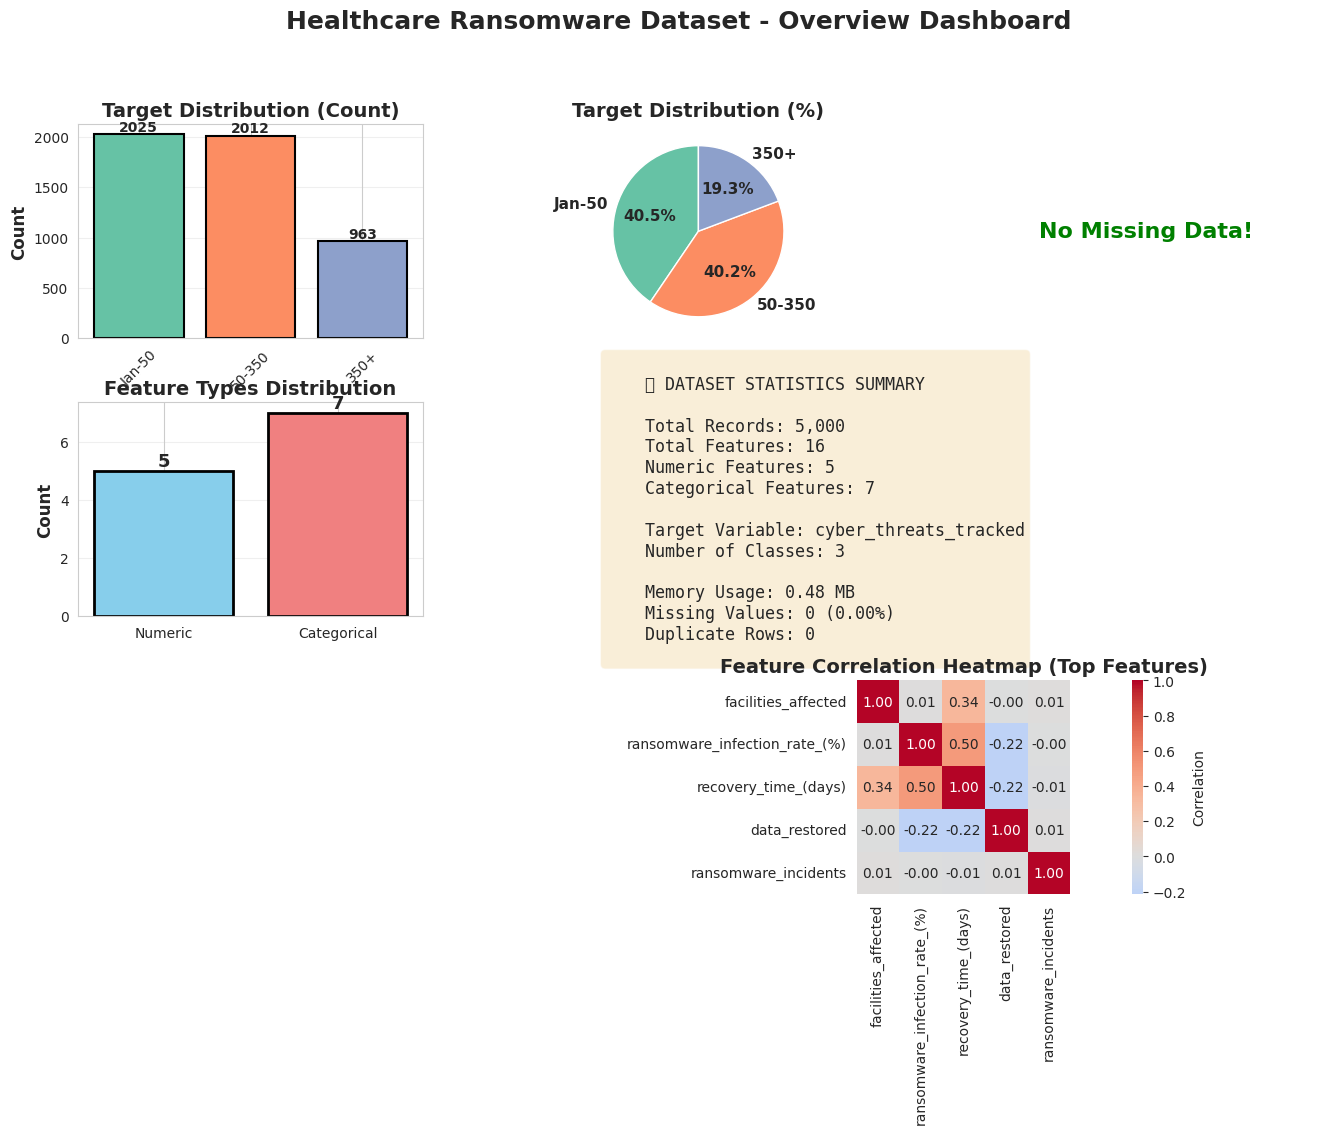

✓ Saved: 02_numeric_distributions.png


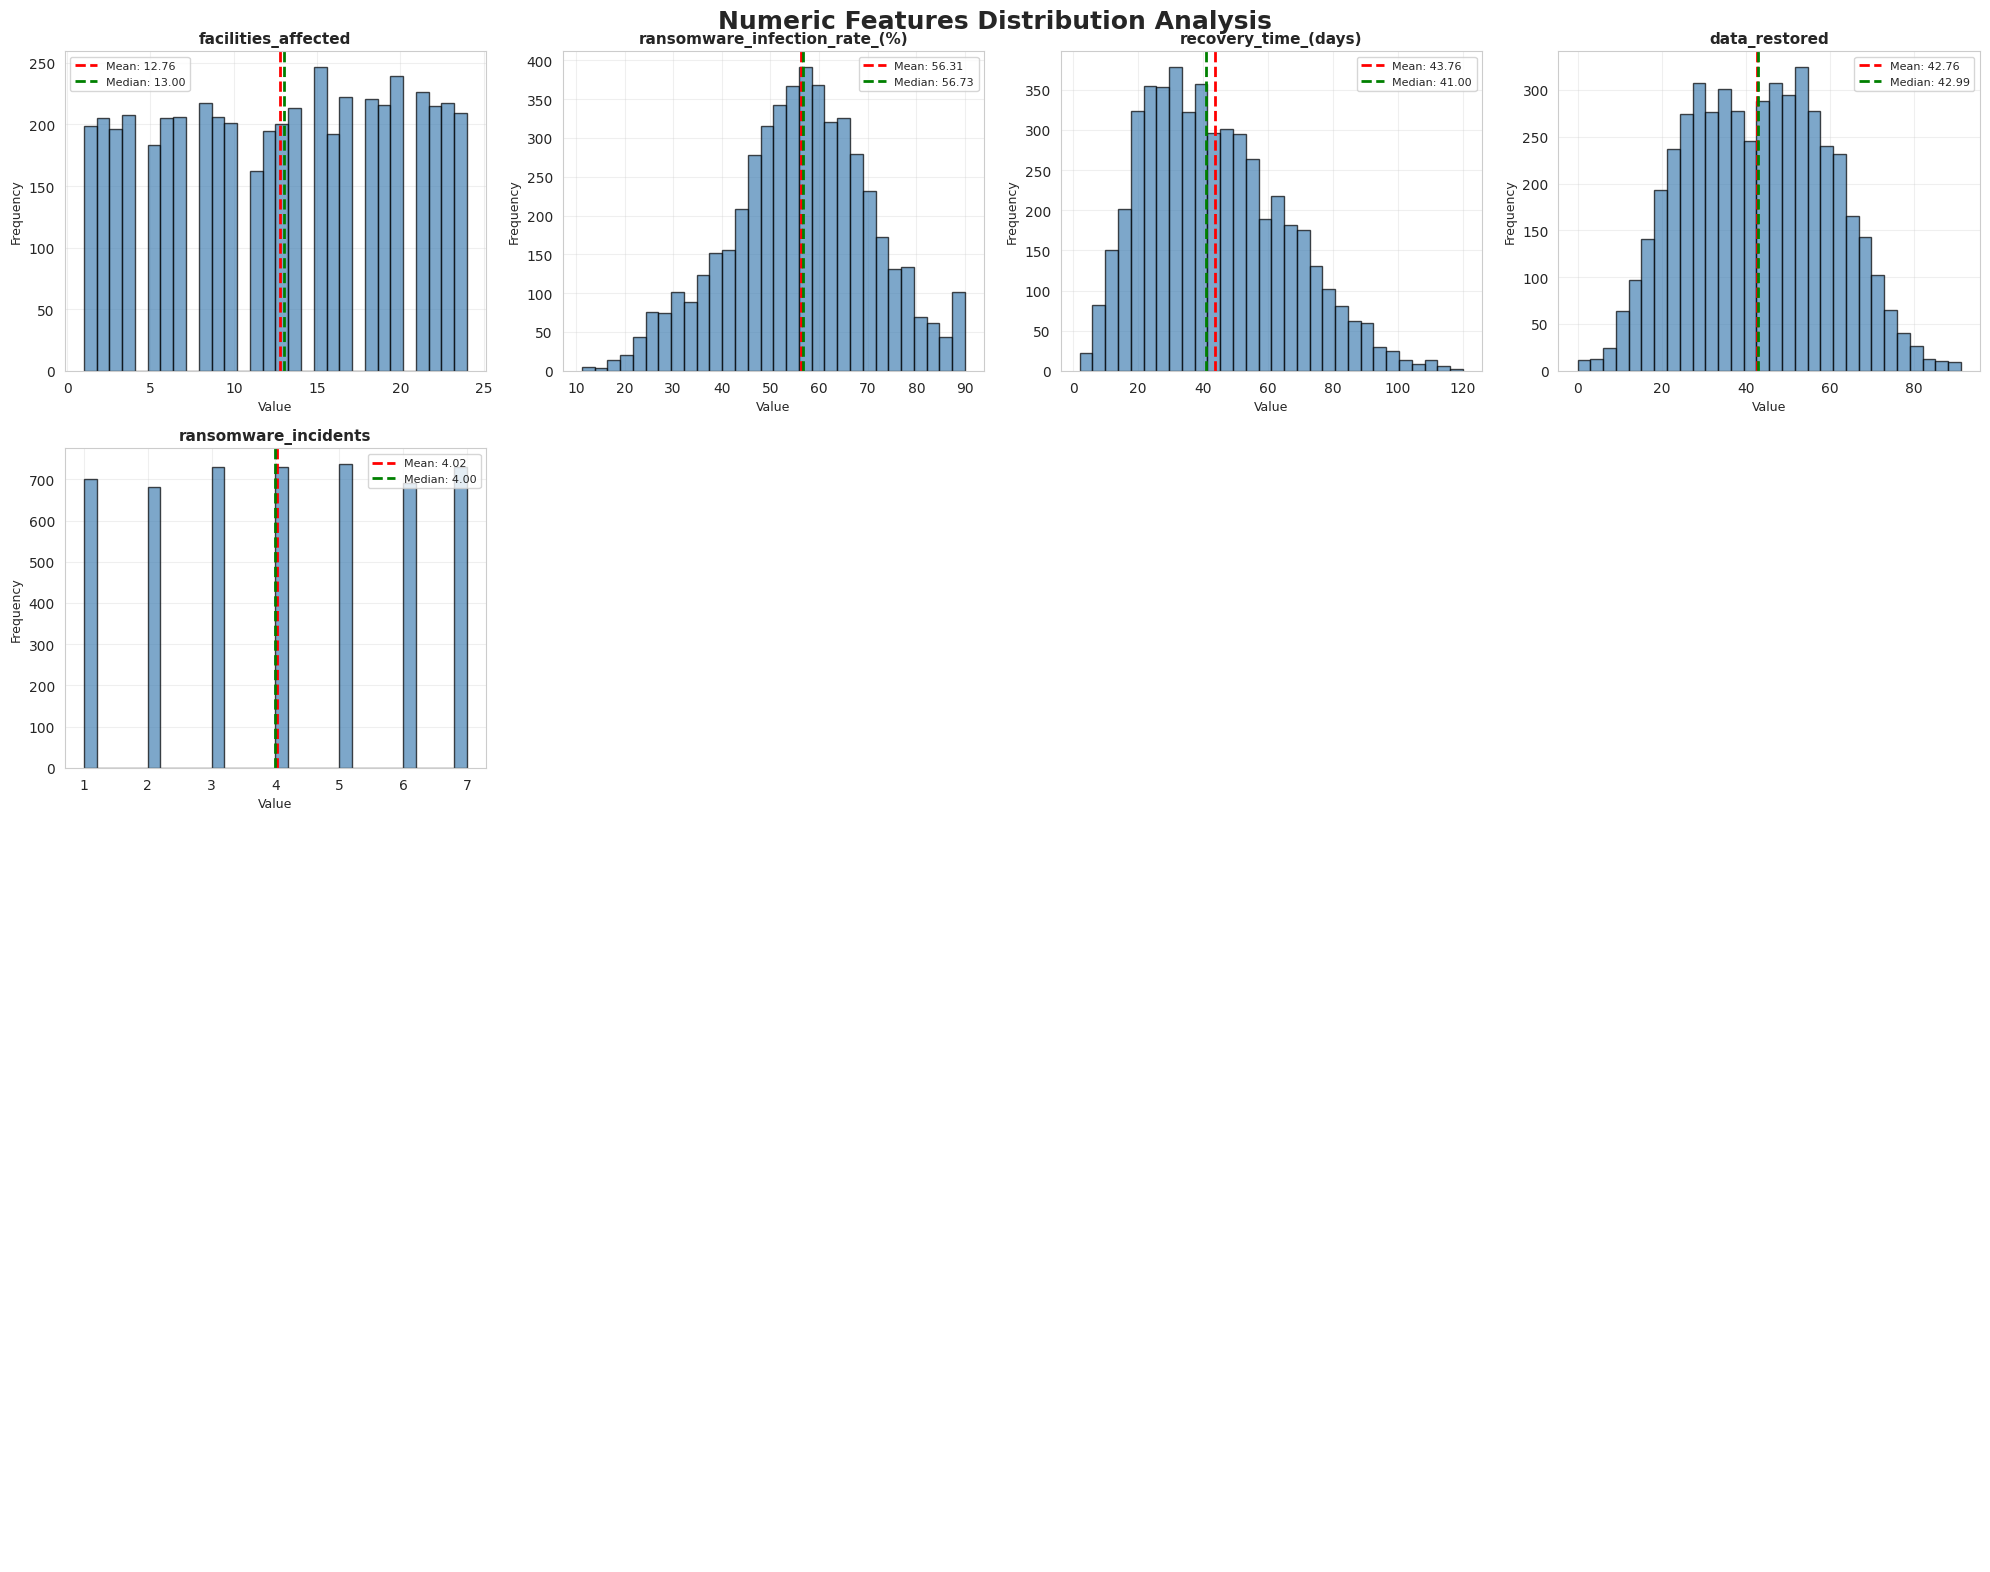

✓ Saved: 03_outlier_analysis.png


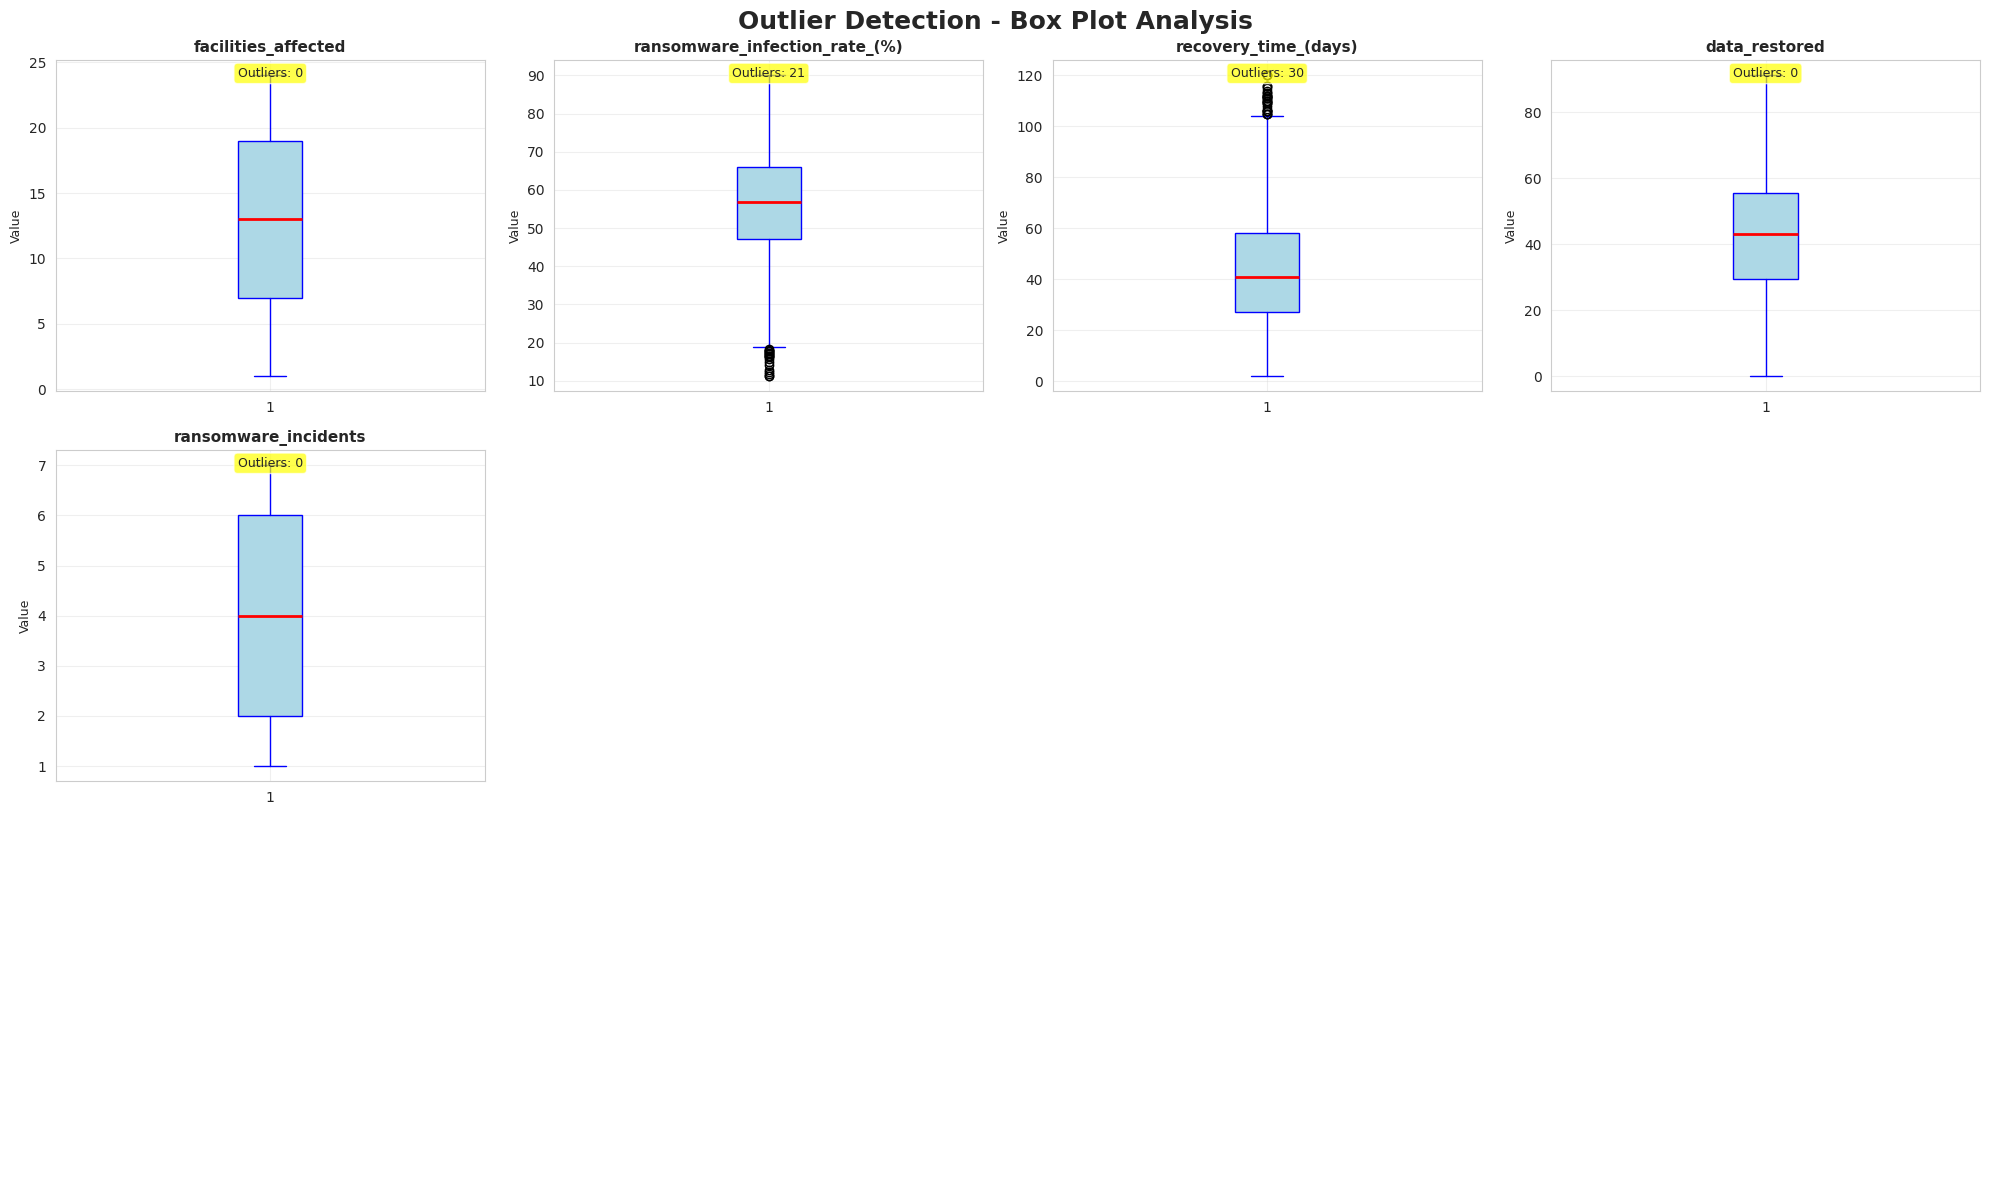

✓ Saved: 05_categorical_analysis.png


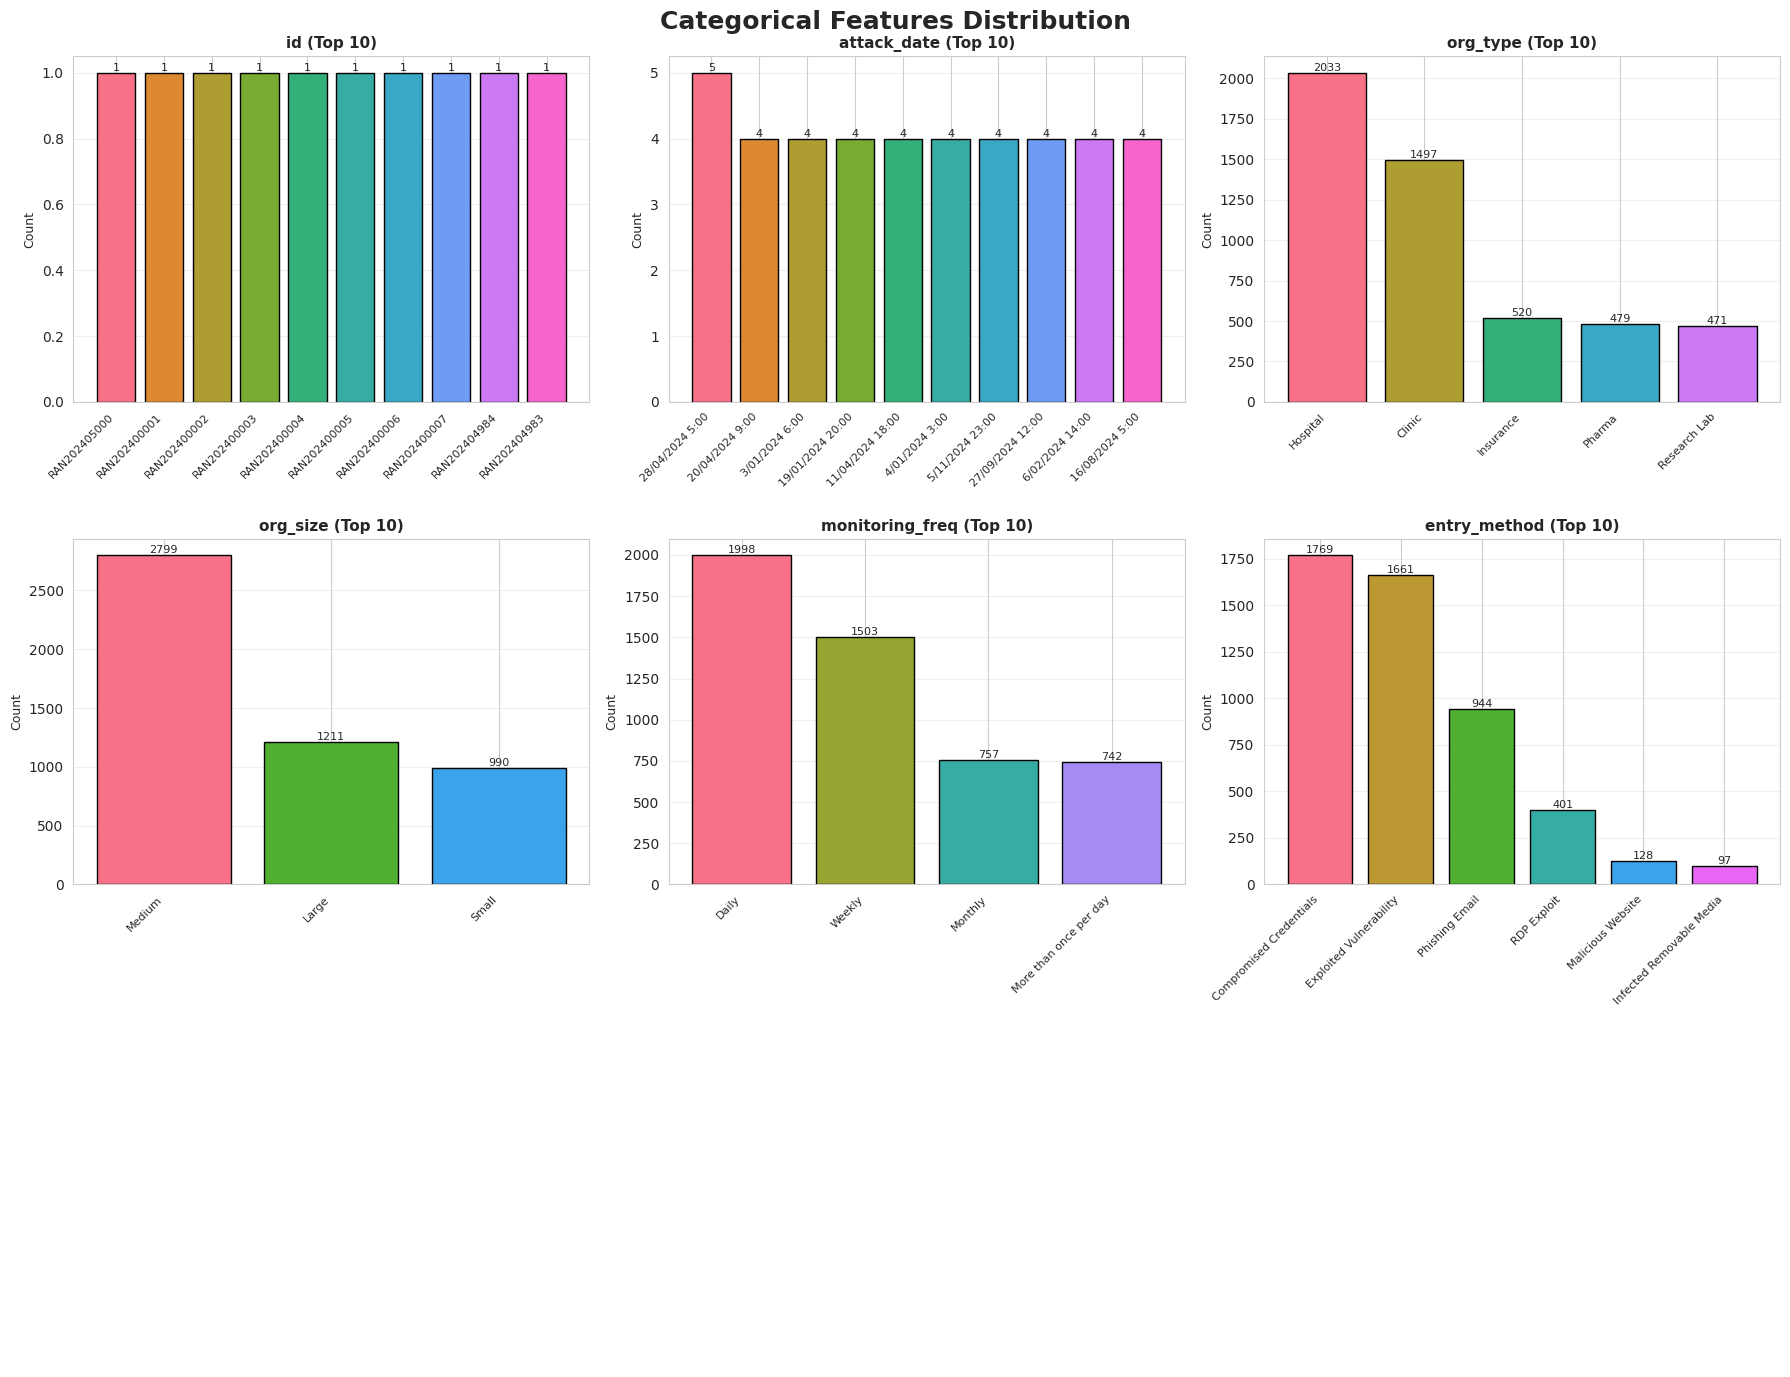


✓ All visualizations completed!

DATA PREPROCESSING
Removed ID column: id

🎯 Target: cyber_threats_tracked
Features: 14
Samples: 5000

Numeric features: 5
Categorical features: 5

🔄 Encoding 5 categorical features...
✓ Encoding completed

✓ Target encoded: ['350+' '50-350' 'Jan-50']

✓ Final shape: (5000, 14)

FEATURE IMPORTANCE ANALYSIS
✓ Saved: 06_feature_importance.png


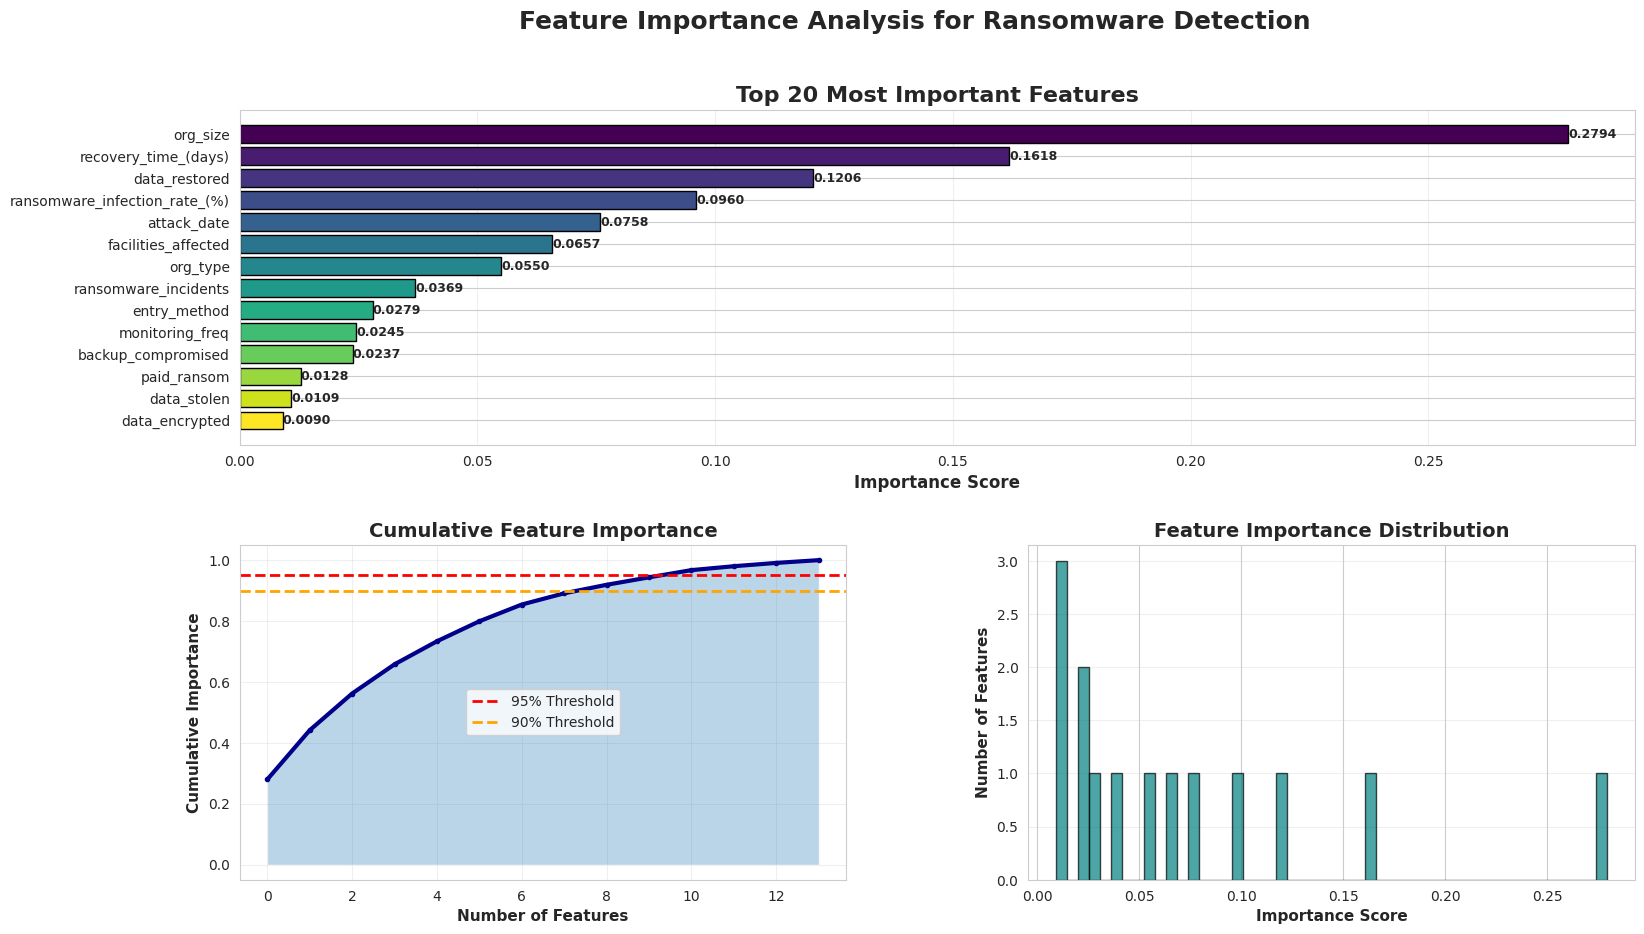


📊 Top 20 Features:
                      feature  importance  cumulative
                     org_size    0.279410    0.279410
         recovery_time_(days)    0.161786    0.441196
                data_restored    0.120580    0.561776
ransomware_infection_rate_(%)    0.095953    0.657729
                  attack_date    0.075753    0.733482
          facilities_affected    0.065746    0.799227
                     org_type    0.054980    0.854207
         ransomware_incidents    0.036895    0.891102
                 entry_method    0.027933    0.919035
              monitoring_freq    0.024530    0.943565
           backup_compromised    0.023723    0.967289
                  paid_ransom    0.012784    0.980072
                  data_stolen    0.010879    0.990952
               data_encrypted    0.009048    1.000000

📊 Data Split:
  Training: 4000 samples
  Testing: 1000 samples

TRAINING MACHINE LEARNING MODELS

Training: Logistic Regression
✓ Accuracy: 0.6650
✓ Precision: 0.6630
✓ 

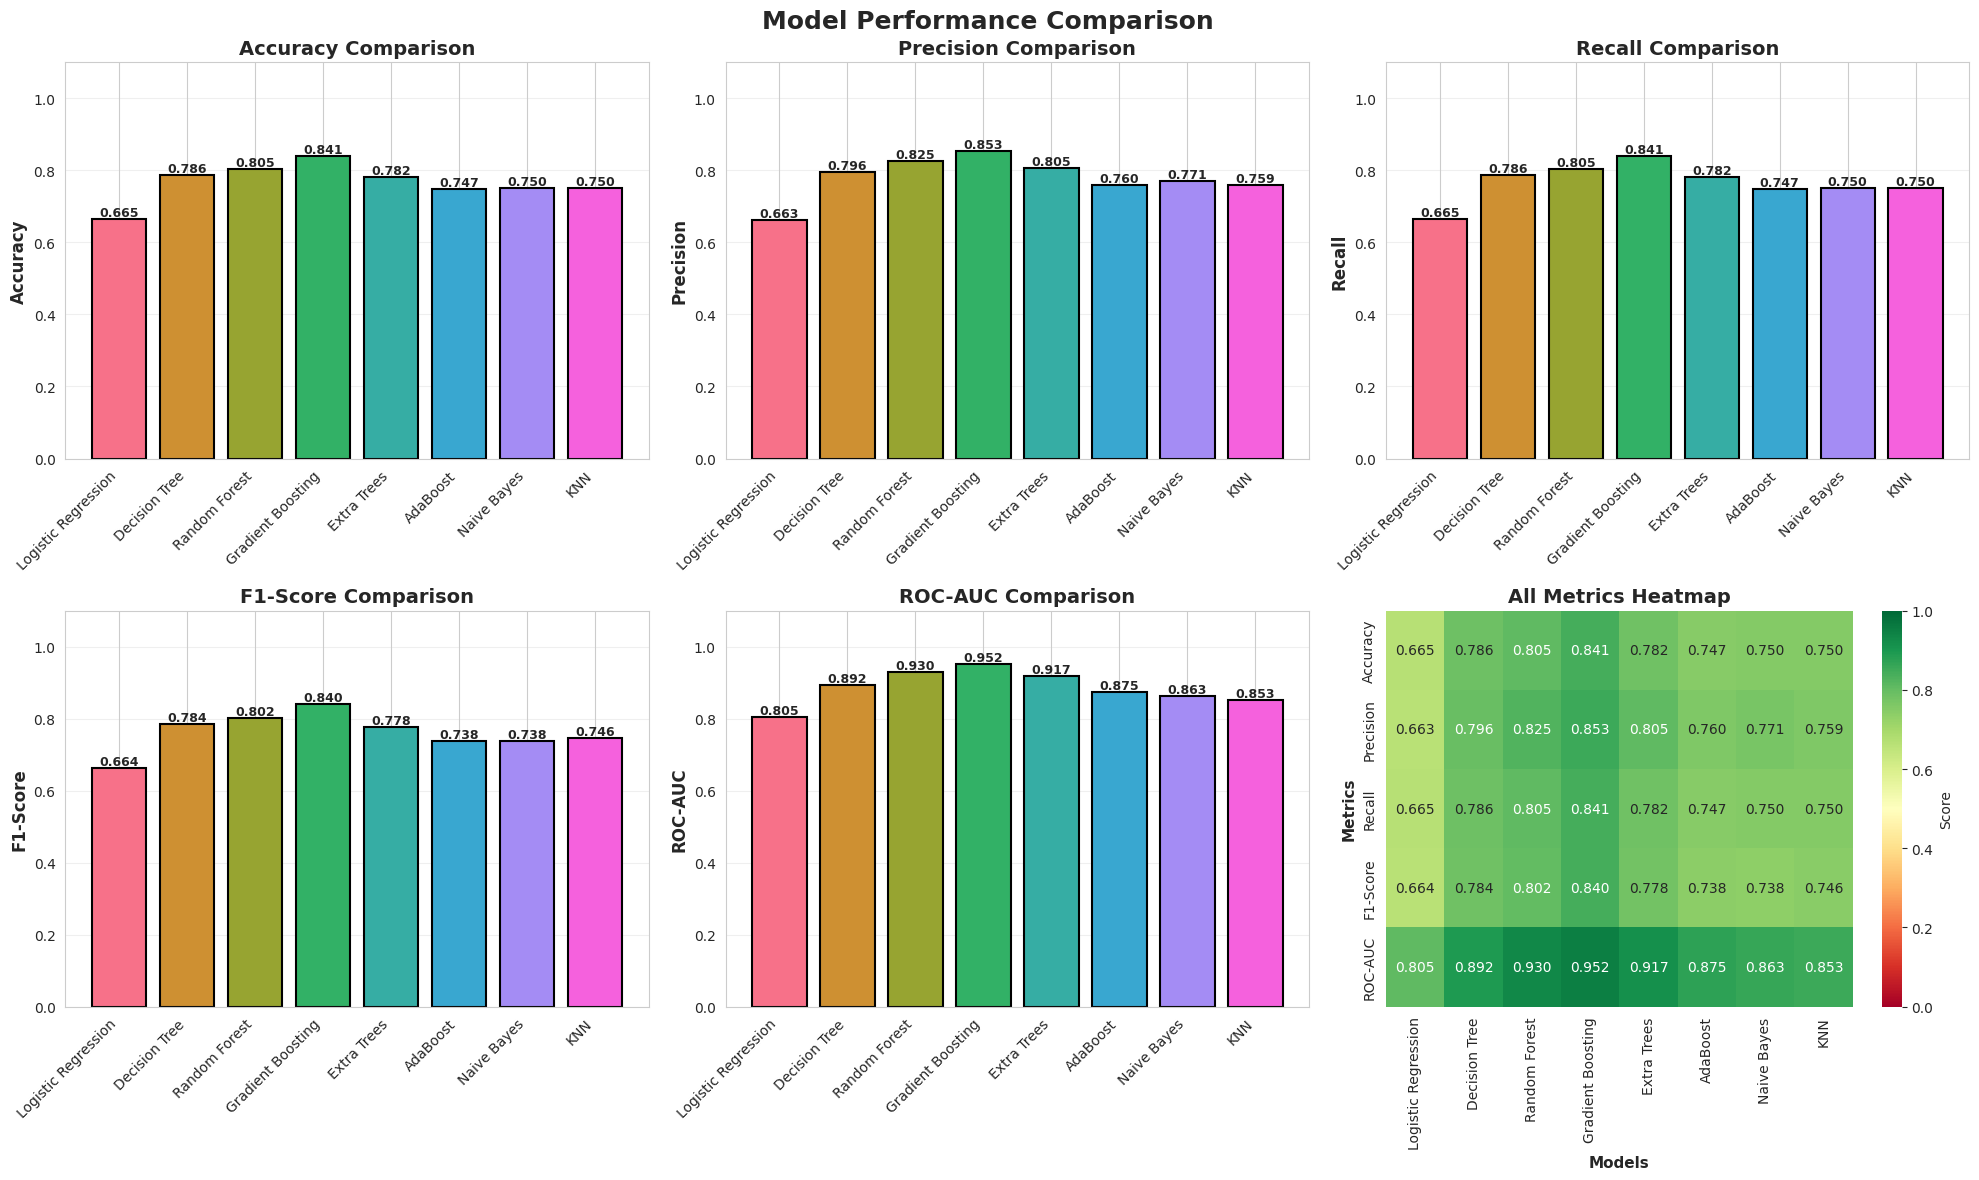

✓ Saved: 08_roc_curves.png


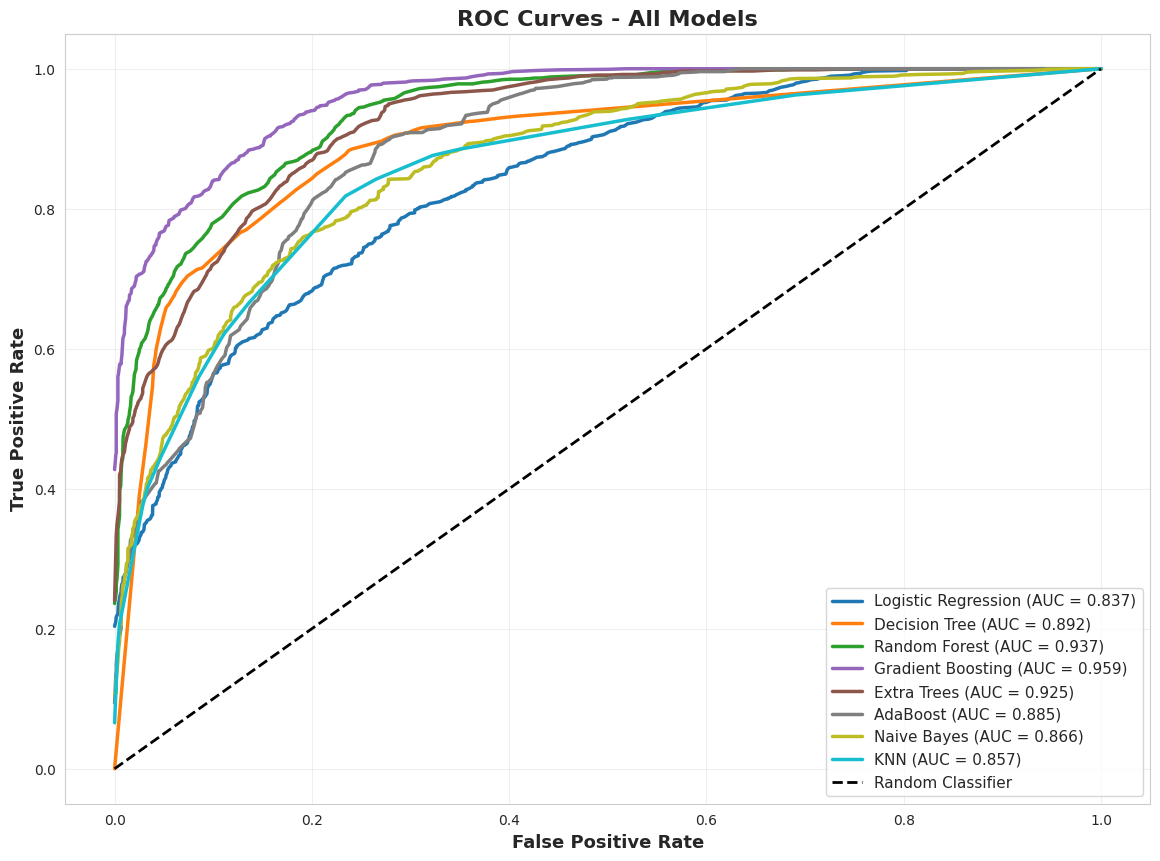

✓ Saved: 09_confusion_matrices.png


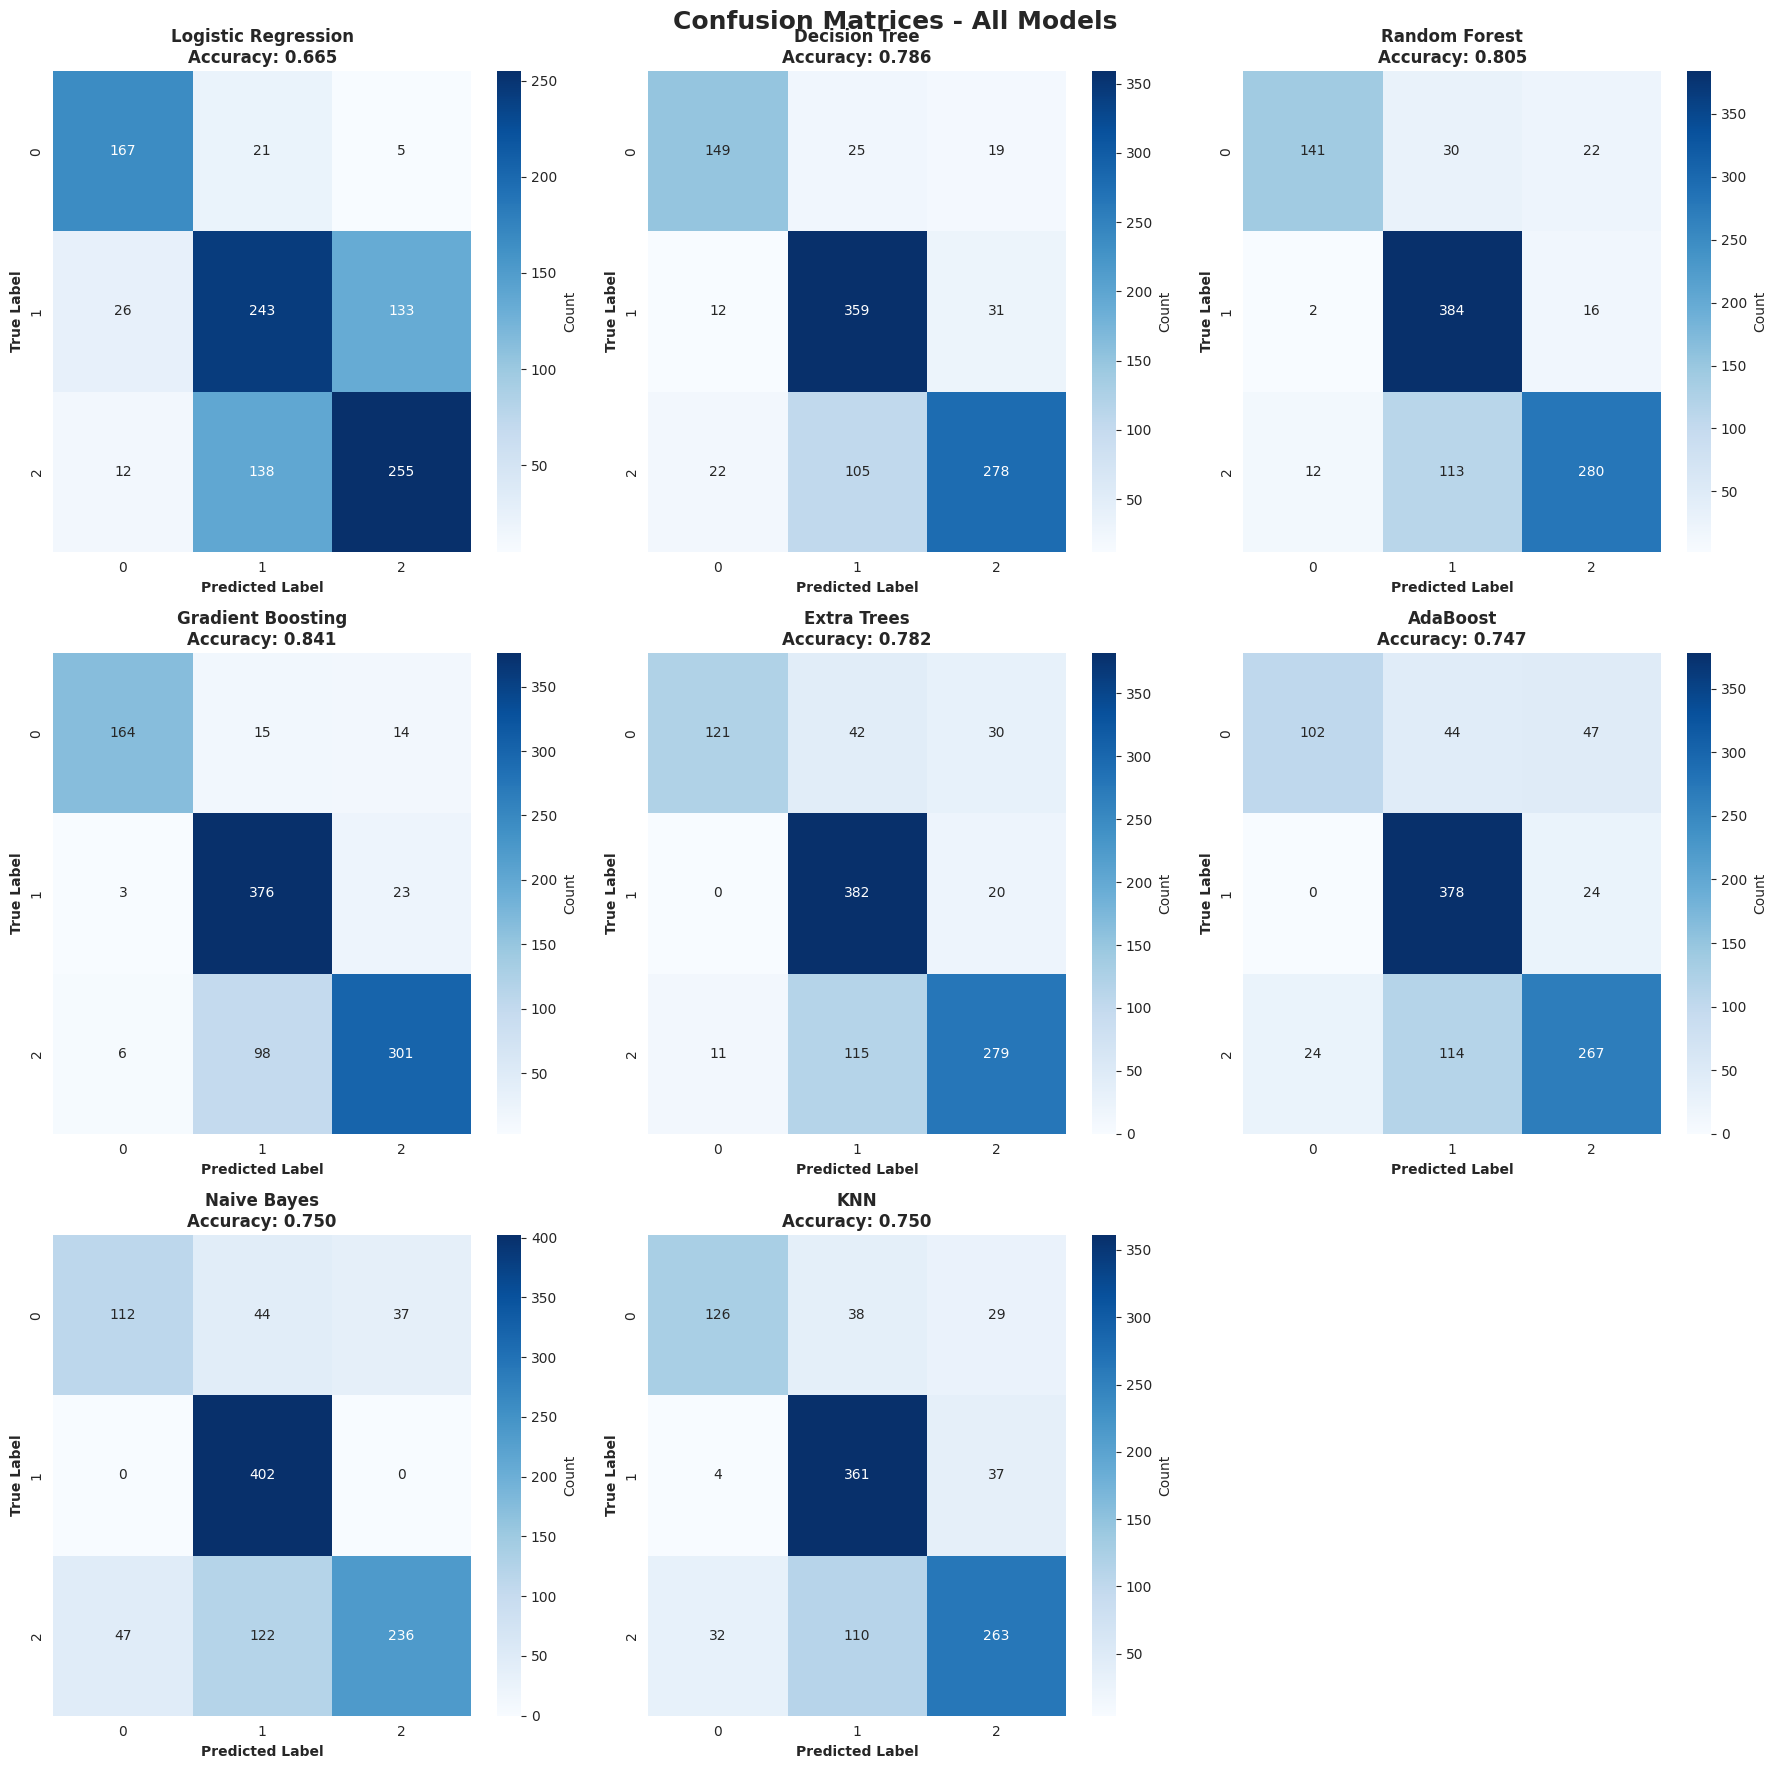

✓ Saved: 10_cross_validation.png


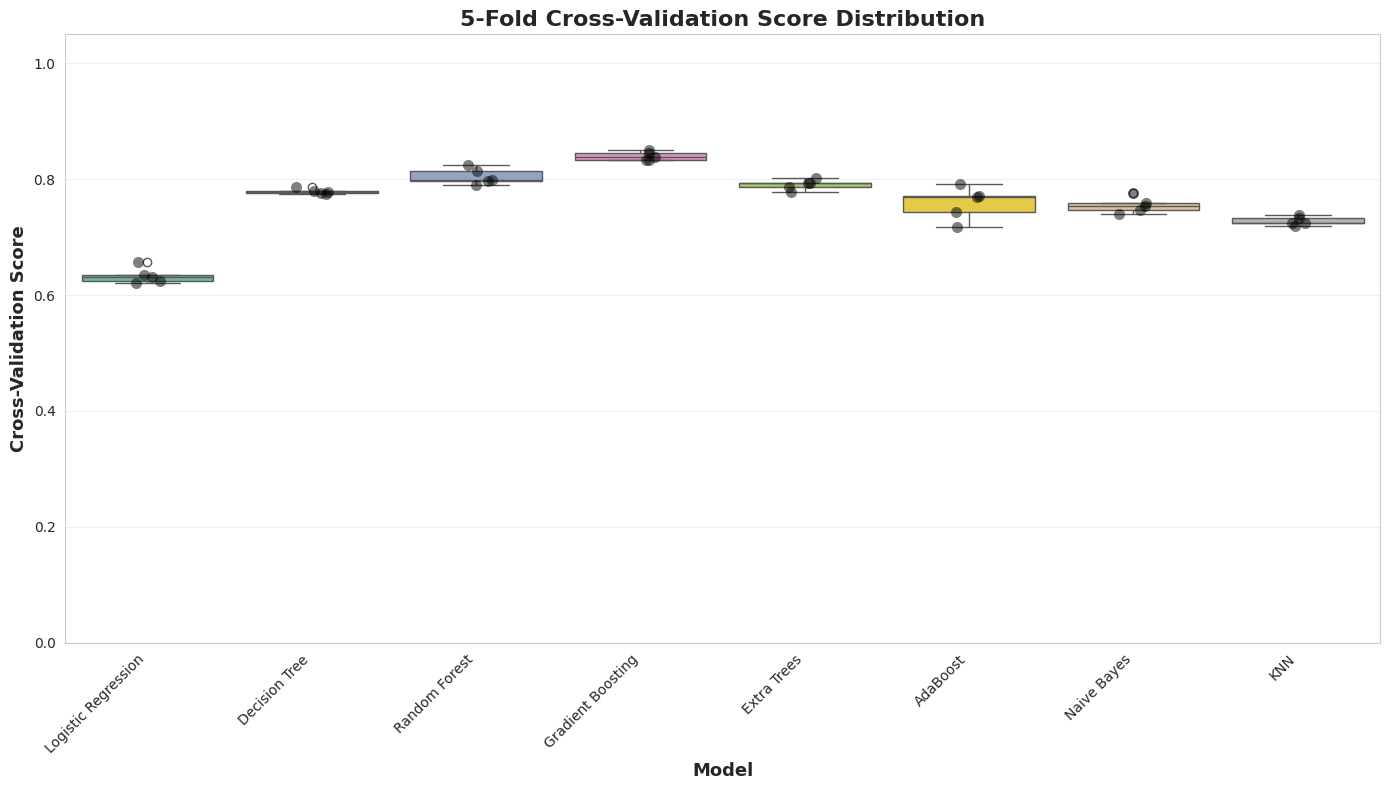


MODEL PERFORMANCE SUMMARY
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
  Gradient Boosting     0.841   0.852730   0.841  0.840391 0.951947
      Random Forest     0.805   0.825090   0.805  0.802421 0.930335
      Decision Tree     0.786   0.795533   0.786  0.784112 0.892090
        Extra Trees     0.782   0.805272   0.782  0.777984 0.917429
                KNN     0.750   0.758977   0.750  0.745834 0.852512
        Naive Bayes     0.750   0.770574   0.750  0.737969 0.862582
           AdaBoost     0.747   0.759664   0.747  0.738500 0.874746
Logistic Regression     0.665   0.663011   0.665  0.663799 0.805343

🏆 Best Model: Gradient Boosting
   Accuracy: 0.8410
   F1-Score: 0.8404
   ROC-AUC: 0.9519

                              PIPELINE COMPLETED SUCCESSFULLY!

📊 Generated Visualizations:
   01_dataset_overview.png
   02_numeric_distributions.png
   03_outlier_analysis.png
   04_target_feature_relationship.png
   05_categorical_analysis.png
   06_feature_importa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                               AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                              roc_curve, accuracy_score, precision_score, recall_score,
                              f1_score, matthews_corrcoef, auc)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# ============================================================================
# 1. DATA LOADING AND COMPREHENSIVE VISUALIZATION
# ============================================================================

def load_and_visualize_data(filepath='RHC.csv'):
    """Load Healthcare Ransomware Dataset with comprehensive visualizations"""
    print("="*80)
    print("HEALTHCARE RANSOMWARE DATASET - COMPREHENSIVE ANALYSIS")
    print("="*80)

    # Load data
    df = pd.read_csv(filepath)

    print(f"\n Dataset Shape: {df.shape[0]} records × {df.shape[1]} features")
    print(f" Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

    # Display basic info
    print("\n" + "-"*80)
    print("FEATURE OVERVIEW")
    print("-"*80)

    info_df = pd.DataFrame({
        'Feature': df.columns,
        'Type': df.dtypes.values,
        'Non-Null': df.count().values,
        'Null': df.isnull().sum().values,
        'Null %': (df.isnull().sum().values / len(df) * 100).round(2),
        'Unique': [df[col].nunique() for col in df.columns]
    })
    print(info_df.to_string(index=False))

    return df

def create_comprehensive_visualizations(df, target_col=None):
    """Create comprehensive visualizations for presentation"""

    print("\n" + "="*80)
    print("GENERATING COMPREHENSIVE VISUALIZATIONS FOR PRESENTATION")
    print("="*80)

    # Auto-detect target column
    if target_col is None:
        target_keywords = ['attack', 'ransomware', 'malware', 'threat', 'infected',
                          'label', 'class', 'target', 'breach']
        for col in df.columns:
            if any(keyword in col.lower() for keyword in target_keywords):
                if df[col].nunique() <= 10:
                    target_col = col
                    break
        if target_col is None:
            target_col = df.columns[-1]

    print(f"\n Target Variable: {target_col}")

    # ========================================================================
    # VISUALIZATION 1: Target Distribution
    # ========================================================================
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

    # Target distribution - Bar
    ax1 = fig.add_subplot(gs[0, 0])
    target_counts = df[target_col].value_counts()
    colors = sns.color_palette("Set2", len(target_counts))
    bars = ax1.bar(range(len(target_counts)), target_counts.values, color=colors, edgecolor='black', linewidth=1.5)
    ax1.set_xticks(range(len(target_counts)))
    ax1.set_xticklabels(target_counts.index, rotation=45)
    ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax1.set_title('Target Distribution (Count)', fontsize=14, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

    # Target distribution - Pie
    ax2 = fig.add_subplot(gs[0, 1])
    target_pct = df[target_col].value_counts()
    wedges, texts, autotexts = ax2.pie(target_pct.values, labels=target_pct.index,
                                        autopct='%1.1f%%', colors=colors,
                                        startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
    ax2.set_title('Target Distribution (%)', fontsize=14, fontweight='bold')

    # Data completeness
    ax3 = fig.add_subplot(gs[0, 2])
    missing_data = df.isnull().sum().sort_values(ascending=False)[:15]
    if missing_data.sum() > 0:
        ax3.barh(range(len(missing_data)), missing_data.values, color='coral', edgecolor='black')
        ax3.set_yticks(range(len(missing_data)))
        ax3.set_yticklabels(missing_data.index, fontsize=9)
        ax3.set_xlabel('Missing Values Count', fontsize=11, fontweight='bold')
        ax3.set_title('Top 15 Features with Missing Data', fontsize=12, fontweight='bold')
        ax3.grid(axis='x', alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'No Missing Data!', ha='center', va='center',
                fontsize=16, fontweight='bold', color='green')
        ax3.set_xlim(0, 1)
        ax3.set_ylim(0, 1)
        ax3.axis('off')

    # Numeric vs Categorical features
    ax4 = fig.add_subplot(gs[1, 0])
    numeric_count = len(df.select_dtypes(include=['int64', 'float64']).columns)
    categorical_count = len(df.select_dtypes(include=['object']).columns)
    feature_types = ['Numeric', 'Categorical']
    feature_counts = [numeric_count, categorical_count]
    bars = ax4.bar(feature_types, feature_counts, color=['skyblue', 'lightcoral'],
                   edgecolor='black', linewidth=2)
    ax4.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax4.set_title('Feature Types Distribution', fontsize=14, fontweight='bold')
    ax4.grid(axis='y', alpha=0.3)
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=13, fontweight='bold')

    # Dataset statistics summary
    ax5 = fig.add_subplot(gs[1, 1:])
    ax5.axis('off')
    stats_text = f"""
     DATASET STATISTICS SUMMARY

    Total Records: {len(df):,}
    Total Features: {len(df.columns)}
    Numeric Features: {numeric_count}
    Categorical Features: {categorical_count}

    Target Variable: {target_col}
    Number of Classes: {df[target_col].nunique()}

    Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB
    Missing Values: {df.isnull().sum().sum():,} ({df.isnull().sum().sum() / df.size * 100:.2f}%)
    Duplicate Rows: {df.duplicated().sum():,}
    """
    ax5.text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center',
            family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Correlation heatmap for numeric features
    ax6 = fig.add_subplot(gs[2, :])
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    if len(numeric_df.columns) > 1:
        # Select top 15 features by correlation with target
        if target_col in numeric_df.columns:
            correlations = numeric_df.corr()[target_col].abs().sort_values(ascending=False)
            top_features = correlations.head(16).index.tolist()  # 15 + target
            corr_matrix = numeric_df[top_features].corr()
        else:
            top_features = numeric_df.columns[:15]
            corr_matrix = numeric_df[top_features].corr()

        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                   center=0, square=True, ax=ax6, cbar_kws={'label': 'Correlation'})
        ax6.set_title('Feature Correlation Heatmap (Top Features)', fontsize=14, fontweight='bold')

    plt.suptitle('Healthcare Ransomware Dataset - Overview Dashboard',
                fontsize=18, fontweight='bold', y=0.995)
    plt.savefig('01_dataset_overview.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: 01_dataset_overview.png")
    plt.show()

    # ========================================================================
    # VISUALIZATION 2: Numeric Features Distribution
    # ========================================================================
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)

    if len(numeric_cols) > 0:
        n_features = min(16, len(numeric_cols))
        fig, axes = plt.subplots(4, 4, figsize=(20, 16))
        axes = axes.ravel()

        for idx in range(n_features):
            col = numeric_cols[idx]
            axes[idx].hist(df[col].dropna(), bins=30, color='steelblue',
                          edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
            axes[idx].set_xlabel('Value', fontsize=9)
            axes[idx].set_ylabel('Frequency', fontsize=9)
            axes[idx].grid(alpha=0.3)

            # Add statistics
            mean_val = df[col].mean()
            median_val = df[col].median()
            axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
            axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
            axes[idx].legend(fontsize=8)

        # Hide unused subplots
        for idx in range(n_features, 16):
            axes[idx].axis('off')

        plt.suptitle('Numeric Features Distribution Analysis', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.savefig('02_numeric_distributions.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 02_numeric_distributions.png")
        plt.show()

    # ========================================================================
    # VISUALIZATION 3: Box Plots for Outlier Detection
    # ========================================================================
    if len(numeric_cols) > 0:
        n_features = min(12, len(numeric_cols))
        fig, axes = plt.subplots(3, 4, figsize=(20, 12))
        axes = axes.ravel()

        for idx in range(n_features):
            col = numeric_cols[idx]
            bp = axes[idx].boxplot(df[col].dropna(), patch_artist=True,
                                   boxprops=dict(facecolor='lightblue', color='blue'),
                                   medianprops=dict(color='red', linewidth=2),
                                   whiskerprops=dict(color='blue'),
                                   capprops=dict(color='blue'))
            axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
            axes[idx].set_ylabel('Value', fontsize=9)
            axes[idx].grid(alpha=0.3)

            # Add outlier count
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col].count()
            axes[idx].text(0.5, 0.95, f'Outliers: {outliers}',
                          transform=axes[idx].transAxes, ha='center',
                          fontsize=9, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

        for idx in range(n_features, 12):
            axes[idx].axis('off')

        plt.suptitle('Outlier Detection - Box Plot Analysis', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.savefig('03_outlier_analysis.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 03_outlier_analysis.png")
        plt.show()

    # ========================================================================
    # VISUALIZATION 4: Target vs Features Relationship
    # ========================================================================
    if len(numeric_cols) >= 6:
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        axes = axes.ravel()

        for idx in range(min(6, len(numeric_cols))):
            col = numeric_cols[idx]
            df_plot = df[[col, target_col]].dropna()

            # Violin plot
            sns.violinplot(data=df_plot, x=target_col, y=col, ax=axes[idx], palette='Set2')
            axes[idx].set_title(f'{col} vs {target_col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(target_col, fontsize=10, fontweight='bold')
            axes[idx].set_ylabel(col, fontsize=10)
            axes[idx].grid(alpha=0.3)

        plt.suptitle('Feature Distribution by Target Class', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.savefig('04_target_feature_relationship.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 04_target_feature_relationship.png")
        plt.show()

    # ========================================================================
    # VISUALIZATION 5: Categorical Features Analysis
    # ========================================================================
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)

    if len(categorical_cols) > 0:
        n_features = min(9, len(categorical_cols))
        fig, axes = plt.subplots(3, 3, figsize=(18, 14))
        axes = axes.ravel()

        for idx in range(n_features):
            col = categorical_cols[idx]
            top_categories = df[col].value_counts().head(10)

            bars = axes[idx].bar(range(len(top_categories)), top_categories.values,
                                color=sns.color_palette("husl", len(top_categories)),
                                edgecolor='black')
            axes[idx].set_xticks(range(len(top_categories)))
            axes[idx].set_xticklabels(top_categories.index, rotation=45, ha='right', fontsize=8)
            axes[idx].set_title(f'{col} (Top 10)', fontsize=11, fontweight='bold')
            axes[idx].set_ylabel('Count', fontsize=9)
            axes[idx].grid(axis='y', alpha=0.3)

            # Add value labels
            for bar in bars:
                height = bar.get_height()
                axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                             f'{int(height)}', ha='center', va='bottom', fontsize=8)

        for idx in range(n_features, 9):
            axes[idx].axis('off')

        plt.suptitle('Categorical Features Distribution', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.savefig('05_categorical_analysis.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 05_categorical_analysis.png")
        plt.show()

    print("\n✓ All visualizations completed!")
    return target_col

# ============================================================================
# 2. DATA PREPROCESSING
# ============================================================================

class RansomwarePreprocessor:
    """Preprocessing for Healthcare Ransomware Dataset"""

    def __init__(self, target_column):
        self.target_column = target_column
        self.label_encoders = {}
        self.scaler = RobustScaler()

    def preprocess(self, df):
        print("\n" + "="*80)
        print("DATA PREPROCESSING")
        print("="*80)

        # Remove ID columns
        id_cols = ['X', 'id', 'ID', 'index']
        for col in id_cols:
            if col in df.columns:
                df = df.drop(col, axis=1)
                print(f"Removed ID column: {col}")

        # Separate target
        y = df[self.target_column].copy()
        X = df.drop(self.target_column, axis=1)

        print(f"\n🎯 Target: {self.target_column}")
        print(f"Features: {X.shape[1]}")
        print(f"Samples: {X.shape[0]}")

        # Identify column types
        numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

        print(f"\nNumeric features: {len(numeric_cols)}")
        print(f"Categorical features: {len(categorical_cols)}")

        # Handle missing values
        if X.isnull().sum().sum() > 0:
            print("\n⚠ Handling missing values...")
            numeric_imputer = SimpleImputer(strategy='median')
            categorical_imputer = SimpleImputer(strategy='most_frequent')

            if numeric_cols:
                X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])
            if categorical_cols:
                X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])
            print("✓ Missing values handled")

        # Encode categorical variables
        if categorical_cols:
            print(f"\n🔄 Encoding {len(categorical_cols)} categorical features...")
            for col in categorical_cols:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col].astype(str))
                self.label_encoders[col] = le
            print("✓ Encoding completed")

        # Encode target
        if y.dtype == 'object':
            le_target = LabelEncoder()
            y = le_target.fit_transform(y)
            self.label_encoders['target'] = le_target
            print(f"\n✓ Target encoded: {le_target.classes_}")

        print(f"\n✓ Final shape: {X.shape}")
        return X, y

# ============================================================================
# 3. FEATURE IMPORTANCE VISUALIZATION
# ============================================================================

def visualize_feature_importance(X, y, feature_names, top_n=20):
    """Comprehensive feature importance analysis"""
    print("\n" + "="*80)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("="*80)

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X, y)

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    # Create visualization
    fig = plt.figure(figsize=(18, 10))
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

    # Top features bar plot
    ax1 = fig.add_subplot(gs[0, :])
    top_features = importance_df.head(top_n)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
    bars = ax1.barh(range(len(top_features)), top_features['importance'], color=colors, edgecolor='black')
    ax1.set_yticks(range(len(top_features)))
    ax1.set_yticklabels(top_features['feature'], fontsize=10)
    ax1.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
    ax1.set_title(f'Top {top_n} Most Important Features', fontsize=16, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    ax1.invert_yaxis()

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax1.text(width, bar.get_y() + bar.get_height()/2.,
                f'{width:.4f}', ha='left', va='center', fontsize=9, fontweight='bold')

    # Cumulative importance
    ax2 = fig.add_subplot(gs[1, 0])
    importance_df['cumulative'] = importance_df['importance'].cumsum()
    ax2.plot(range(len(importance_df)), importance_df['cumulative'],
            linewidth=3, color='darkblue', marker='o', markersize=3)
    ax2.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% Threshold')
    ax2.axhline(y=0.90, color='orange', linestyle='--', linewidth=2, label='90% Threshold')
    ax2.fill_between(range(len(importance_df)), importance_df['cumulative'], alpha=0.3)
    ax2.set_xlabel('Number of Features', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Cumulative Importance', fontsize=11, fontweight='bold')
    ax2.set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)

    # Feature importance distribution
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.hist(importance_df['importance'], bins=50, color='teal', edgecolor='black', alpha=0.7)
    ax3.set_xlabel('Importance Score', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Number of Features', fontsize=11, fontweight='bold')
    ax3.set_title('Feature Importance Distribution', fontsize=14, fontweight='bold')
    ax3.grid(axis='y', alpha=0.3)

    plt.suptitle('Feature Importance Analysis for Ransomware Detection',
                fontsize=18, fontweight='bold')
    plt.savefig('06_feature_importance.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: 06_feature_importance.png")
    plt.show()

    print(f"\n Top {top_n} Features:")
    print(importance_df.head(top_n).to_string(index=False))

    return importance_df

# ============================================================================
# 4. MACHINE LEARNING MODELS WITH VISUALIZATIONS
# ============================================================================

class RansomwareDetectionML:
    """ML Pipeline with comprehensive visualizations"""

    def __init__(self, X, y, test_size=0.2, random_state=42):
        self.X = X
        self.y = y
        self.random_state = random_state
        self.models = {}
        self.results = {}

        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )

        print(f"\n Data Split:")
        print(f"  Training: {self.X_train.shape[0]} samples")
        print(f"  Testing: {self.X_test.shape[0]} samples")

        # Scale features
        self.scaler = RobustScaler()
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

    def train_models(self):
        """Train multiple ML models"""
        print("\n" + "="*80)
        print("TRAINING MACHINE LEARNING MODELS")
        print("="*80)

        self.models = {
            'Logistic Regression': LogisticRegression(max_iter=1000, random_state=self.random_state),
            'Decision Tree': DecisionTreeClassifier(random_state=self.random_state, max_depth=10),
            'Random Forest': RandomForestClassifier(n_estimators=200, random_state=self.random_state, n_jobs=-1),
            'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=self.random_state),
            'Extra Trees': ExtraTreesClassifier(n_estimators=200, random_state=self.random_state, n_jobs=-1),
            'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=self.random_state),
            'Naive Bayes': GaussianNB(),
            'KNN': KNeighborsClassifier(n_neighbors=5)
        }

        for name, model in self.models.items():
            print(f"\n{'='*80}")
            print(f"Training: {name}")
            print(f"{'='*80}")

            # Train
            if name in ['Logistic Regression', 'Naive Bayes', 'KNN']:
                model.fit(self.X_train_scaled, self.y_train)
                y_pred = model.predict(self.X_test_scaled)
                y_pred_proba = model.predict_proba(self.X_test_scaled)
            else:
                model.fit(self.X_train, self.y_train)
                y_pred = model.predict(self.X_test)
                y_pred_proba = model.predict_proba(self.X_test)

            # Calculate metrics
            accuracy = accuracy_score(self.y_test, y_pred)
            precision = precision_score(self.y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(self.y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(self.y_test, y_pred, average='weighted', zero_division=0)

            # ROC AUC (handle multiclass)
            if len(np.unique(self.y)) == 2:
                roc_auc = roc_auc_score(self.y_test, y_pred_proba[:, 1])
            else:
                roc_auc = roc_auc_score(self.y_test, y_pred_proba, multi_class='ovr', average='weighted')

            # Cross-validation
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)
            if name in ['Logistic Regression', 'Naive Bayes', 'KNN']:
                cv_scores = cross_val_score(model, self.X_train_scaled, self.y_train,
                                           cv=cv, scoring='accuracy')
            else:
                cv_scores = cross_val_score(model, self.X_train, self.y_train,
                                           cv=cv, scoring='accuracy')

            print(f"✓ Accuracy: {accuracy:.4f}")
            print(f"✓ Precision: {precision:.4f}")
            print(f"✓ Recall: {recall:.4f}")
            print(f"✓ F1-Score: {f1:.4f}")
            print(f"✓ ROC-AUC: {roc_auc:.4f}")
            print(f"✓ CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

            # Store results
            self.results[name] = {
                'model': model,
                'y_pred': y_pred,
                'y_pred_proba': y_pred_proba,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'roc_auc': roc_auc,
                'cv_scores': cv_scores
            }

        print("\n✓ All models trained successfully!")

    def visualize_model_comparison(self):
        """Create comprehensive model comparison visualizations"""
        print("\n" + "="*80)
        print("GENERATING MODEL COMPARISON VISUALIZATIONS")
        print("="*80)

        # Prepare data
        model_names = list(self.results.keys())
        metrics_data = {
            'Model': model_names,
            'Accuracy': [self.results[m]['accuracy'] for m in model_names],
            'Precision': [self.results[m]['precision'] for m in model_names],
            'Recall': [self.results[m]['recall'] for m in model_names],
            'F1-Score': [self.results[m]['f1'] for m in model_names],
            'ROC-AUC': [self.results[m]['roc_auc'] for m in model_names]
        }
        metrics_df = pd.DataFrame(metrics_data)

        # VISUALIZATION 1: Metrics Comparison
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))

        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
        colors_palette = sns.color_palette("husl", len(model_names))

        for idx, metric in enumerate(metrics):
            ax = axes[idx // 3, idx % 3]
            bars = ax.bar(range(len(model_names)), metrics_df[metric],
                         color=colors_palette, edgecolor='black', linewidth=1.5)
            ax.set_xticks(range(len(model_names)))
            ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)
            ax.set_ylabel(metric, fontsize=12, fontweight='bold')
            ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
            ax.set_ylim([0, 1.1])
            ax.grid(axis='y', alpha=0.3)

            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

        # Overall metrics heatmap
        ax = axes[1, 2]
        metrics_matrix = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].T
        metrics_matrix.columns = model_names
        sns.heatmap(metrics_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
                   vmin=0, vmax=1, ax=ax, cbar_kws={'label': 'Score'})
        ax.set_title('All Metrics Heatmap', fontsize=14, fontweight='bold')
        ax.set_ylabel('Metrics', fontsize=11, fontweight='bold')
        ax.set_xlabel('Models', fontsize=11, fontweight='bold')

        plt.suptitle('Model Performance Comparison', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.savefig('07_model_comparison.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 07_model_comparison.png")
        plt.show()

        # VISUALIZATION 2: ROC Curves
        fig, ax = plt.subplots(figsize=(14, 10))

        colors = plt.cm.tab10(np.linspace(0, 1, len(model_names)))

        for idx, name in enumerate(model_names):
            result = self.results[name]

            if len(np.unique(self.y)) == 2:
                fpr, tpr, _ = roc_curve(self.y_test, result['y_pred_proba'][:, 1])
                roc_auc = auc(fpr, tpr)
                ax.plot(fpr, tpr, color=colors[idx], linewidth=2.5,
                       label=f'{name} (AUC = {roc_auc:.3f})')
            else:
                # For multiclass, use macro average
                from sklearn.preprocessing import label_binarize
                y_test_bin = label_binarize(self.y_test, classes=np.unique(self.y))
                n_classes = y_test_bin.shape[1]

                fpr = dict()
                tpr = dict()
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], result['y_pred_proba'][:, i])

                # Aggregate
                all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
                mean_tpr = np.zeros_like(all_fpr)
                for i in range(n_classes):
                    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
                mean_tpr /= n_classes

                roc_auc = auc(all_fpr, mean_tpr)
                ax.plot(all_fpr, mean_tpr, color=colors[idx], linewidth=2.5,
                       label=f'{name} (AUC = {roc_auc:.3f})')

        ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
        ax.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
        ax.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
        ax.set_title('ROC Curves - All Models', fontsize=16, fontweight='bold')
        ax.legend(loc='lower right', fontsize=11)
        ax.grid(True, alpha=0.3)

        plt.savefig('08_roc_curves.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 08_roc_curves.png")
        plt.show()

        # VISUALIZATION 3: Confusion Matrices
        n_models = len(model_names)
        n_cols = 3
        n_rows = (n_models + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
        axes = axes.ravel() if n_models > 1 else [axes]

        for idx, name in enumerate(model_names):
            cm = confusion_matrix(self.y_test, self.results[name]['y_pred'])

            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                       cbar_kws={'label': 'Count'})
            axes[idx].set_title(f'{name}\nAccuracy: {self.results[name]["accuracy"]:.3f}',
                              fontsize=12, fontweight='bold')
            axes[idx].set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
            axes[idx].set_ylabel('True Label', fontsize=10, fontweight='bold')

        # Hide unused subplots
        for idx in range(len(model_names), len(axes)):
            axes[idx].axis('off')

        plt.suptitle('Confusion Matrices - All Models', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.savefig('09_confusion_matrices.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 09_confusion_matrices.png")
        plt.show()

        # VISUALIZATION 4: Cross-Validation Scores
        fig, ax = plt.subplots(figsize=(14, 8))

        cv_data = []
        for name in model_names:
            cv_scores = self.results[name]['cv_scores']
            cv_data.extend([(name, score) for score in cv_scores])

        cv_df = pd.DataFrame(cv_data, columns=['Model', 'CV Score'])

        sns.boxplot(data=cv_df, x='Model', y='CV Score', palette='Set2', ax=ax)
        sns.stripplot(data=cv_df, x='Model', y='CV Score', color='black',
                     alpha=0.5, size=8, ax=ax)

        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_ylabel('Cross-Validation Score', fontsize=13, fontweight='bold')
        ax.set_xlabel('Model', fontsize=13, fontweight='bold')
        ax.set_title('5-Fold Cross-Validation Score Distribution', fontsize=16, fontweight='bold')
        ax.grid(axis='y', alpha=0.3)
        ax.set_ylim([0, 1.05])

        plt.tight_layout()
        plt.savefig('10_cross_validation.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 10_cross_validation.png")
        plt.show()

        # Print comparison table
        print("\n" + "="*80)
        print("MODEL PERFORMANCE SUMMARY")
        print("="*80)
        comparison_df = metrics_df.sort_values('Accuracy', ascending=False)
        print(comparison_df.to_string(index=False))

        print("\n Best Model:", comparison_df.iloc[0]['Model'])
        print(f"   Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")
        print(f"   F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")
        print(f"   ROC-AUC: {comparison_df.iloc[0]['ROC-AUC']:.4f}")

# ============================================================================
# 5. MAIN EXECUTION PIPELINE
# ============================================================================

def main():
    """Main execution pipeline"""
    print("\n" + "="*100)
    print(" " * 20 + "HEALTHCARE RANSOMWARE DATASET - COMPLETE ML PIPELINE")
    print("="*100)

    # Step 1: Load and visualize data
    df = load_and_visualize_data('RHC.csv')
    target_col = create_comprehensive_visualizations(df)

    # Step 2: Preprocess data
    preprocessor = RansomwarePreprocessor(target_column=target_col)
    X, y = preprocessor.preprocess(df)

    # Step 3: Feature importance
    feature_names = X.columns.tolist()
    importance_df = visualize_feature_importance(X.values, y, feature_names, top_n=20)

    # Step 4: Train models and visualize
    ml_pipeline = RansomwareDetectionML(X.values, y)
    ml_pipeline.train_models()
    ml_pipeline.visualize_model_comparison()

    print("\n" + "="*100)
    print(" " * 30 + "PIPELINE COMPLETED SUCCESSFULLY!")
    print("="*100)
    print("\n Generated Visualizations:")
    print("   01_dataset_overview.png")
    print("   02_numeric_distributions.png")
    print("   03_outlier_analysis.png")
    print("   04_target_feature_relationship.png")
    print("   05_categorical_analysis.png")
    print("   06_feature_importance.png")
    print("   07_model_comparison.png")
    print("   08_roc_curves.png")
    print("   09_confusion_matrices.png")
    print("   10_cross_validation.png")
    print("\n✓ All visualizations are ready for your presentation!")

    return ml_pipeline, importance_df

# ============================================================================
# RUN THE COMPLETE PIPELINE
# ============================================================================

if __name__ == "__main__":
    ml_pipeline, importance_df = main()

Deep Learning Models

TensorFlow version: 2.19.0
GPU Available: False

               DEEP LEARNING PIPELINE - HEALTHCARE RANSOMWARE DETECTION

✓ Loaded dataset: (5000, 16)
🎯 Target column: cyber_threats_tracked

DEEP LEARNING DATA PREPROCESSING

🎯 Target Variable: cyber_threats_tracked
📊 Features: 14
📈 Samples: 5000

🔢 Numeric features: 5
🏷️  Categorical features: 5

🔄 Encoding 5 categorical features...
✓ Target encoded: ['350+' '50-350' 'Jan-50']

✓ Final shape: (5000, 14)
✓ Number of classes: 3

📊 Dataset Split:
   Training:    3000 samples (60.0%)
   Validation:  1000 samples (20.0%)
   Testing:     1000 samples (20.0%)

🔧 Scaling features...

TRAINING DEEP LEARNING MODELS

🚀 Training: Simple_DNN

📐 Model Architecture:


Model: "Simple_DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,355 (48.26 KB)

 Trainable params: 12,355 (48.26 KB)

 Non-trainable params: 0 (0.00 B)


🏋️ Training...
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4042 - loss: 1.0639 - val_accuracy: 0.5940 - val_loss: 0.8775 - learning_rate: 0.0010
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5604 - loss: 0.8761 - val_accuracy: 0.7440 - val_loss: 0.6780 - learning_rate: 0.0010
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6776 - loss: 0.6823 - val_accuracy: 0.8220 - val_loss: 0.4728 - learning_rate: 0.0010
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7568 - loss: 0.5565 - val_accuracy: 0.8320 - val_loss: 0.4073 - learning_rate: 0.0010
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7735 - loss: 0.4991 - val_accuracy: 0.8350 - val_loss: 0.3929 - learning_rate: 0.0010
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7936 - loss: 0.4715 - val_accuracy: 0.8380 - val_loss: 0.3840 - learning_rate: 0.0010
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8190 - loss:

Model: "Deep_DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,963 (191.26 KB)

 Trainable params: 48,067 (187.76 KB)

 Non-trainable params: 896 (3.50 KB)


🏋️ Training...
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.3837 - loss: 1.3271 - val_accuracy: 0.5190 - val_loss: 0.9445 - learning_rate: 0.0010
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5144 - loss: 0.9594 - val_accuracy: 0.6530 - val_loss: 0.7983 - learning_rate: 0.0010
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5963 - loss: 0.8183 - val_accuracy: 0.7740 - val_loss: 0.6350 - learning_rate: 0.0010
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6898 - loss: 0.6735 - val_accuracy: 0.8110 - val_loss: 0.5075 - learning_rate: 0.0010
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7185 - loss: 0.6340 - val_accuracy: 0.8260 - val_loss: 0.4484 - learning_rate: 0.0010
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7563 - loss: 0.5813 - val_accuracy: 0.8380 - val_loss: 0.4030 - learning_rate: 0.0010
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7750 - loss

Model: "Wide_DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,363 (685.01 KB)

 Trainable params: 173,827 (679.01 KB)

 Non-trainable params: 1,536 (6.00 KB)


🏋️ Training...
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4652 - loss: 1.7220 - val_accuracy: 0.5290 - val_loss: 1.2391 - learning_rate: 0.0010
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6397 - loss: 1.1950 - val_accuracy: 0.6640 - val_loss: 1.1246 - learning_rate: 0.0010
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7275 - loss: 1.0339 - val_accuracy: 0.8180 - val_loss: 0.8730 - learning_rate: 0.0010
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7552 - loss: 0.9405 - val_accuracy: 0.8230 - val_loss: 0.7851 - learning_rate: 0.0010
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7907 - loss: 0.8411 - val_accuracy: 0.8410 - val_loss: 0.7390 - learning_rate: 0.0010
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7843 - loss: 0.8306 - val_accuracy: 0.8410 - val_loss: 0.7167 - learning_rate: 0.0010
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7945 -

Model: "Residual_DNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │      1,920 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_13[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 128)       │     16,512 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_14[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 128)       │     16,512 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128)       │          0 │ dense_15[0][0],   │
│                     │                   │            │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │      8,256 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_16[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64)        │      4,160 │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64)        │          0 │ dense_17[0][0],   │
│                     │                   │            │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 3)         │        195 │ add_1[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,835 (190.76 KB)

 Trainable params: 48,195 (188.26 KB)

 Non-trainable params: 640 (2.50 KB)


🏋️ Training...
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3805 - loss: 1.7671 - val_accuracy: 0.5650 - val_loss: 0.8922 - learning_rate: 0.0010
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5484 - loss: 0.9662 - val_accuracy: 0.6850 - val_loss: 0.7468 - learning_rate: 0.0010
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6489 - loss: 0.7616 - val_accuracy: 0.7940 - val_loss: 0.5576 - learning_rate: 0.0010
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6924 - loss: 0.6453 - val_accuracy: 0.8270 - val_loss: 0.4499 - learning_rate: 0.0010
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7570 - loss: 0.5571 - val_accuracy: 0.8320 - val_loss: 0.4184 - learning_rate: 0.0010
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7867 - loss: 0.5108 - val_accuracy: 0.8230 - val_loss: 0.4066 - learning_rate: 0.0010
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7842 - loss

Model: "CNN_1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 14, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 7, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 7, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,723 (213.76 KB)

 Trainable params: 54,339 (212.26 KB)

 Non-trainable params: 384 (1.50 KB)


🏋️ Training...
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.4634 - loss: 1.0674 - val_accuracy: 0.4030 - val_loss: 1.0216 - learning_rate: 0.0010
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5747 - loss: 0.8806 - val_accuracy: 0.4080 - val_loss: 1.0600 - learning_rate: 0.0010
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6740 - loss: 0.7581 - val_accuracy: 0.4530 - val_loss: 0.9466 - learning_rate: 0.0010
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7058 - loss: 0.6539 - val_accuracy: 0.6810 - val_loss: 0.7365 - learning_rate: 0.0010
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7486 - loss: 0.5780 - val_accuracy: 0.8000 - val_loss: 0.5455 - learning_rate: 0.0010
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7646 - loss: 0.5519 - val_accuracy: 0.8190 - val_loss: 0.4727 - learning_rate: 0.0010
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7952 -

Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 14, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,147 (461.51 KB)

 Trainable params: 118,147 (461.51 KB)

 Non-trainable params: 0 (0.00 B)


🏋️ Training...
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.4207 - loss: 1.0566 - val_accuracy: 0.4050 - val_loss: 1.0367 - learning_rate: 0.0010
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4205 - loss: 1.0269 - val_accuracy: 0.4080 - val_loss: 1.0290 - learning_rate: 0.0010
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.4050 - loss: 1.0292 - val_accuracy: 0.5170 - val_loss: 0.9609 - learning_rate: 0.0010
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5169 - loss: 0.9623 - val_accuracy: 0.5630 - val_loss: 0.9089 - learning_rate: 0.0010
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5383 - loss: 0.9327 - val_accuracy: 0.5670 - val_loss: 0.8930 - learning_rate: 0.0010
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5565 - loss: 0.8987 - val_accuracy: 0.5680 - val_loss: 0.8942 - learning_rate: 0.0010
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.5981 

Model: "GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 14, 128)        │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,731 (350.51 KB)

 Trainable params: 89,731 (350.51 KB)

 Non-trainable params: 0 (0.00 B)


🏋️ Training...
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.3980 - loss: 1.0670 - val_accuracy: 0.4460 - val_loss: 1.0190 - learning_rate: 0.0010
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4138 - loss: 1.0338 - val_accuracy: 0.4610 - val_loss: 1.0104 - learning_rate: 0.0010
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4827 - loss: 0.9649 - val_accuracy: 0.4980 - val_loss: 0.9490 - learning_rate: 0.0010
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4928 - loss: 0.9512 - val_accuracy: 0.5270 - val_loss: 0.9085 - learning_rate: 0.0010
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4961 - loss: 0.9035 - val_accuracy: 0.4590 - val_loss: 0.9444 - learning_rate: 0.0010
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4996 - loss: 0.9103 - val_accuracy: 0.5690 - val_loss: 0.8349 - learning_rate: 0.0010
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5566 

Model: "Ensemble_DNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 128)       │      1,920 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_25[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 256)       │      3,840 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 64)        │      8,256 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 256)       │          0 │ dense_27[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 64)        │          0 │ dense_26[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 128)       │     32,896 │ dropout_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 64)        │        960 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ dropout_20[0][0], │
│ (Concatenate)       │                   │            │ dense_28[0][0],   │
│                     │                   │            │ dense_29[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 128)       │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 128)       │          0 │ dense_30[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 64)        │      8,256 │ dropout_22[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 3)         │        195 │ dense_31[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 89,731 (350.51 KB)

 Trainable params: 89,475 (349.51 KB)

 Non-trainable params: 256 (1.00 KB)


🏋️ Training...
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4441 - loss: 1.0262 - val_accuracy: 0.6140 - val_loss: 0.7591 - learning_rate: 0.0010
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6694 - loss: 0.7020 - val_accuracy: 0.7790 - val_loss: 0.5291 - learning_rate: 0.0010
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7938 - loss: 0.4839 - val_accuracy: 0.8160 - val_loss: 0.4139 - learning_rate: 0.0010
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7882 - loss: 0.4653 - val_accuracy: 0.8340 - val_loss: 0.3771 - learning_rate: 0.0010
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7987 - loss: 0.4431 - val_accuracy: 0.8490 - val_loss: 0.3671 - learning_rate: 0.0010
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8165 - loss: 0.4144 - val_accuracy: 0.8160 - val_loss: 0.4065 - learning_rate: 0.0010
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8142 - loss:

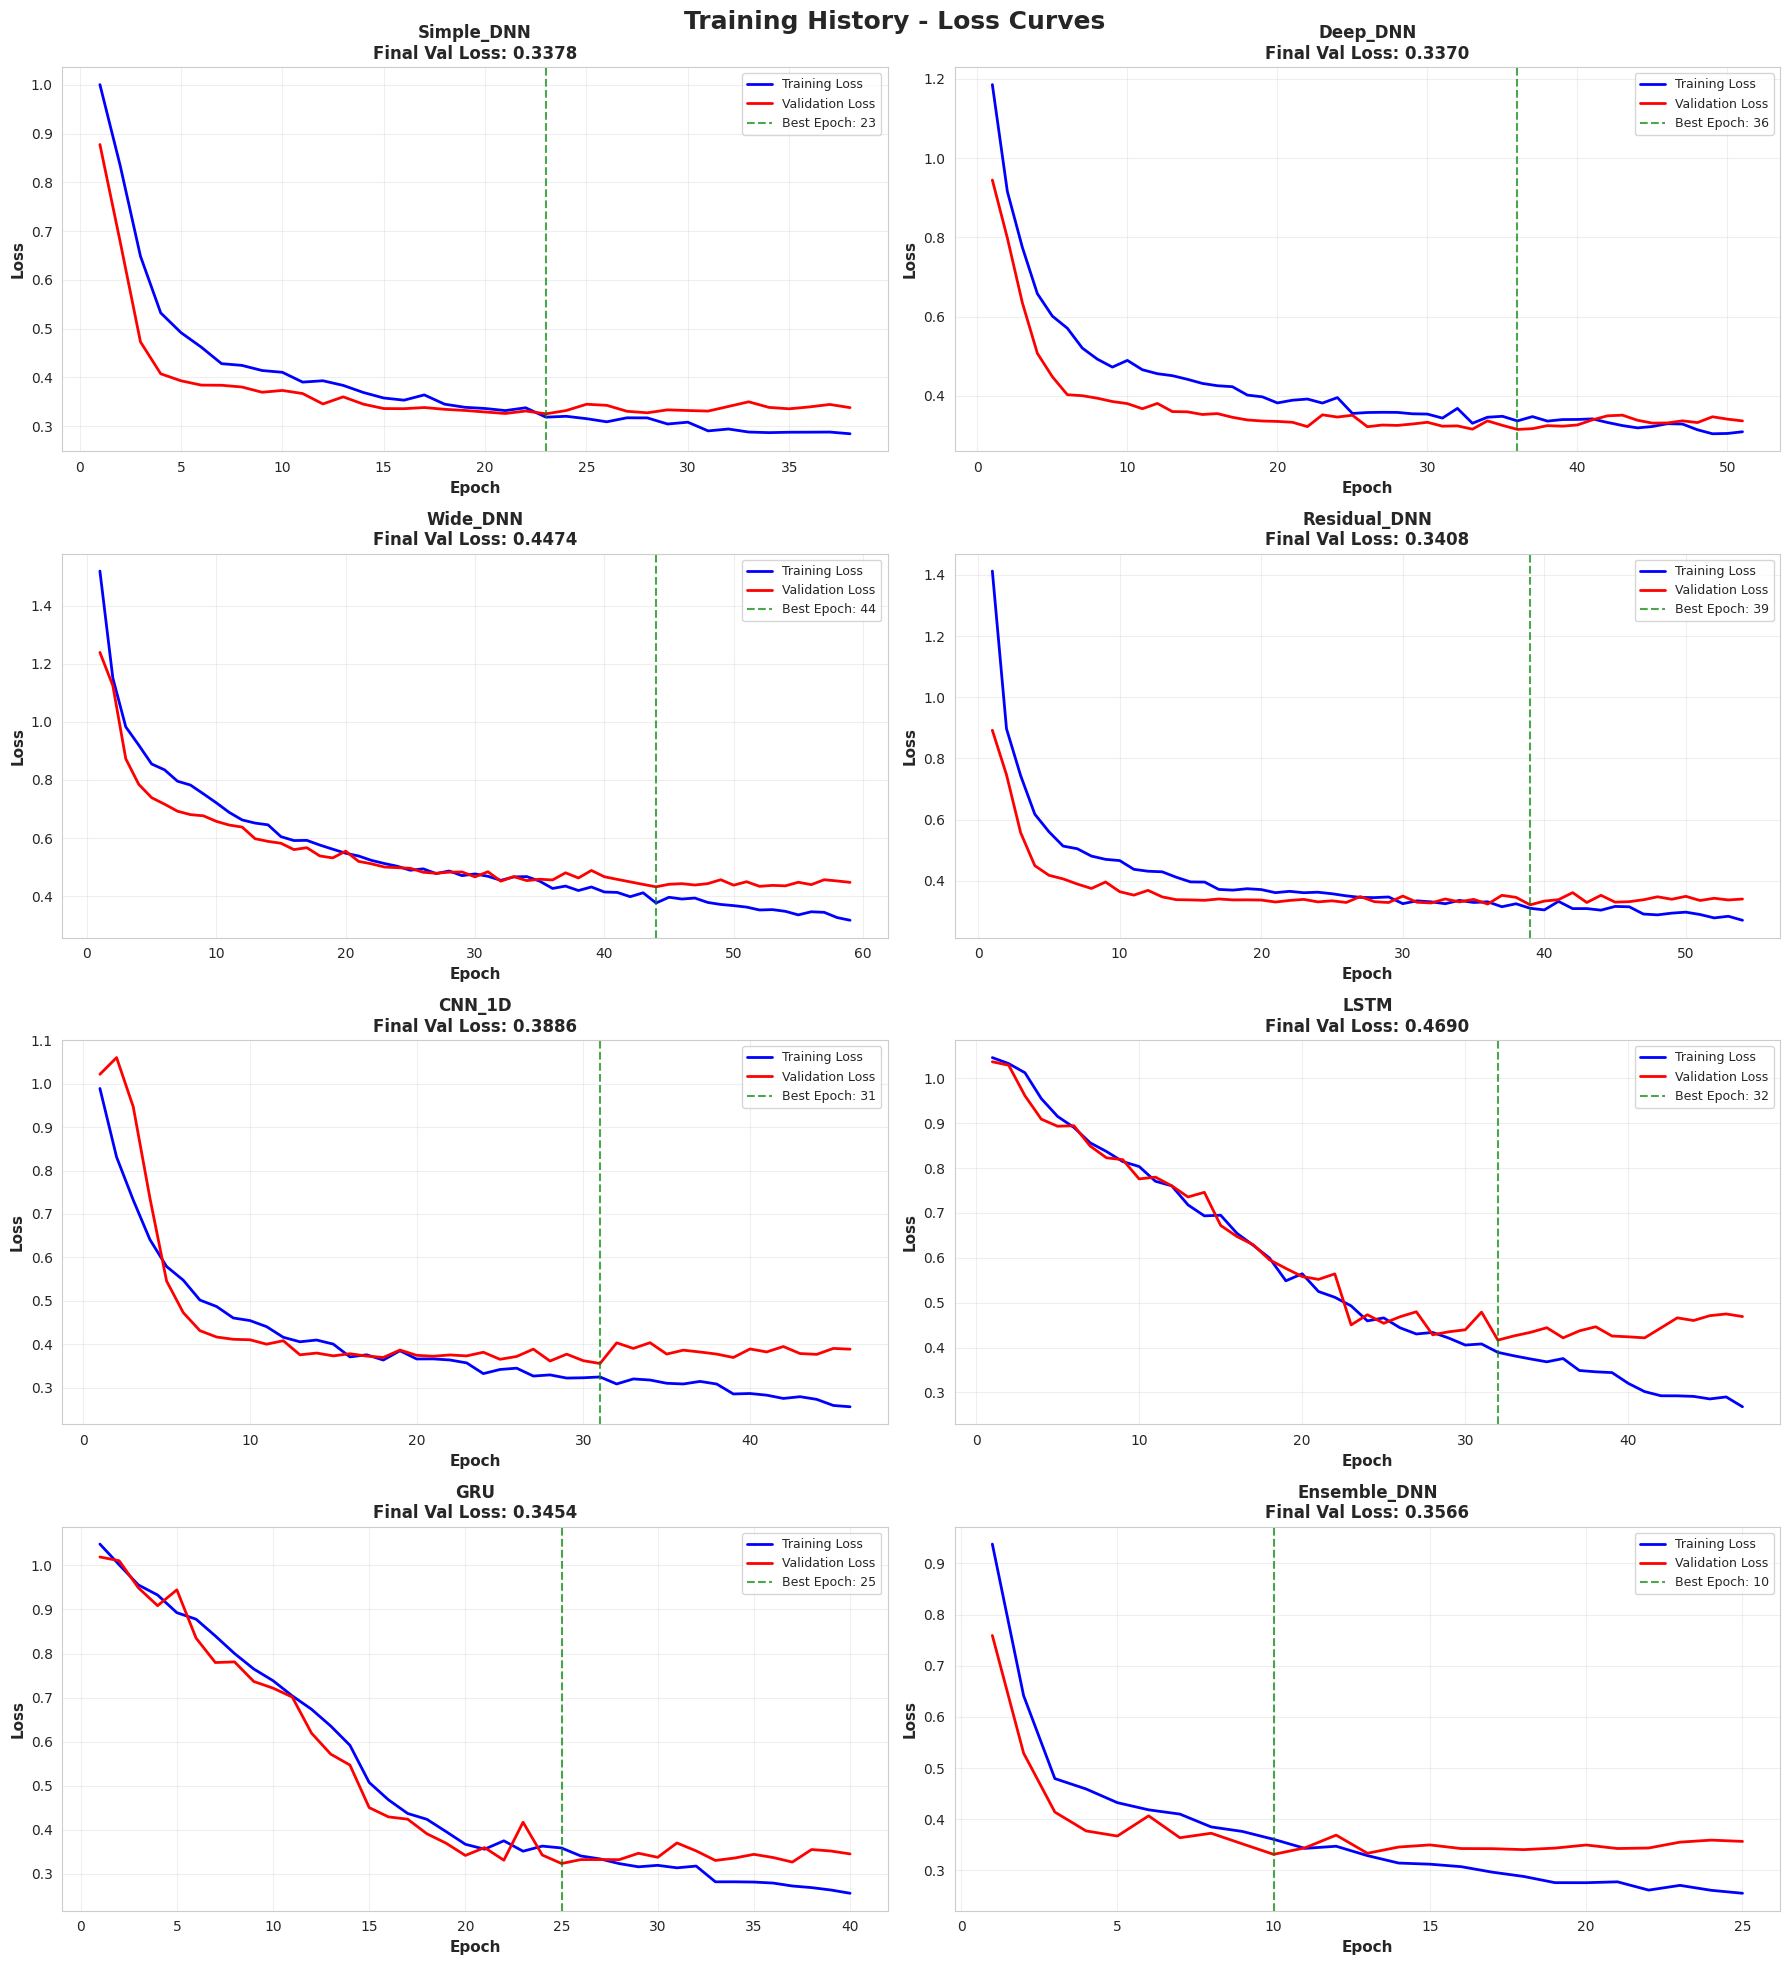

✓ Saved: 12_training_history_accuracy.png


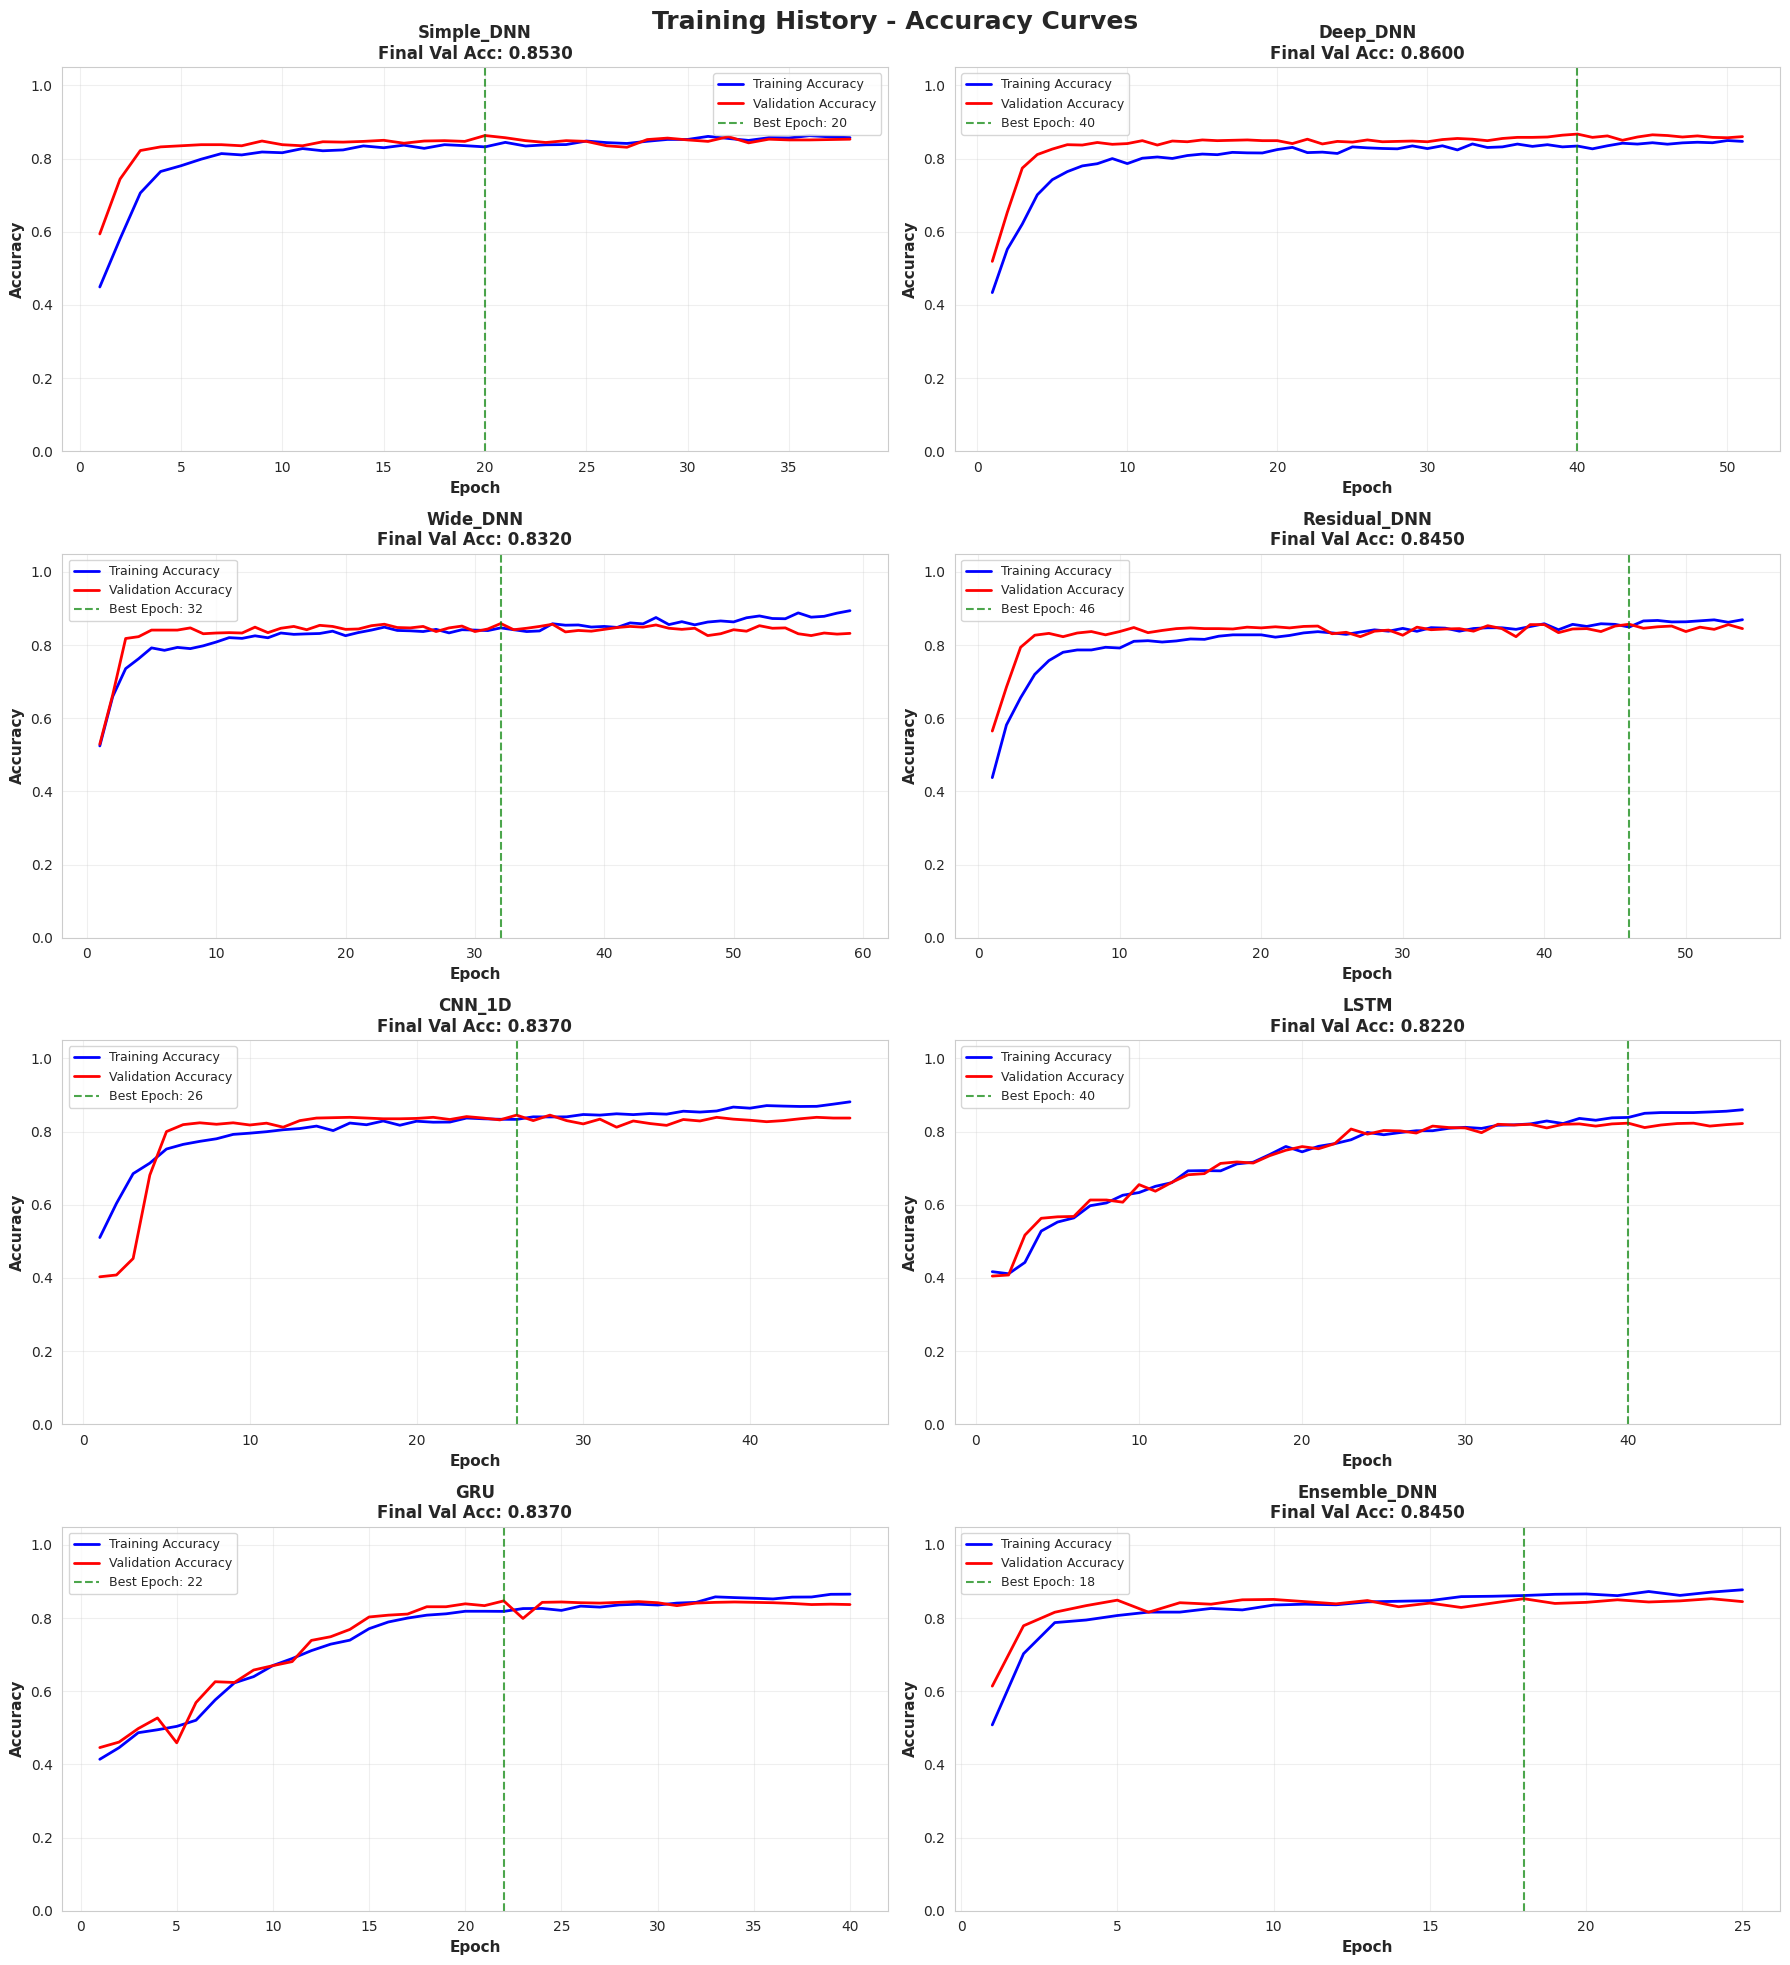


📊 Generating model comparison plots...
✓ Saved: 13_dl_model_comparison.png


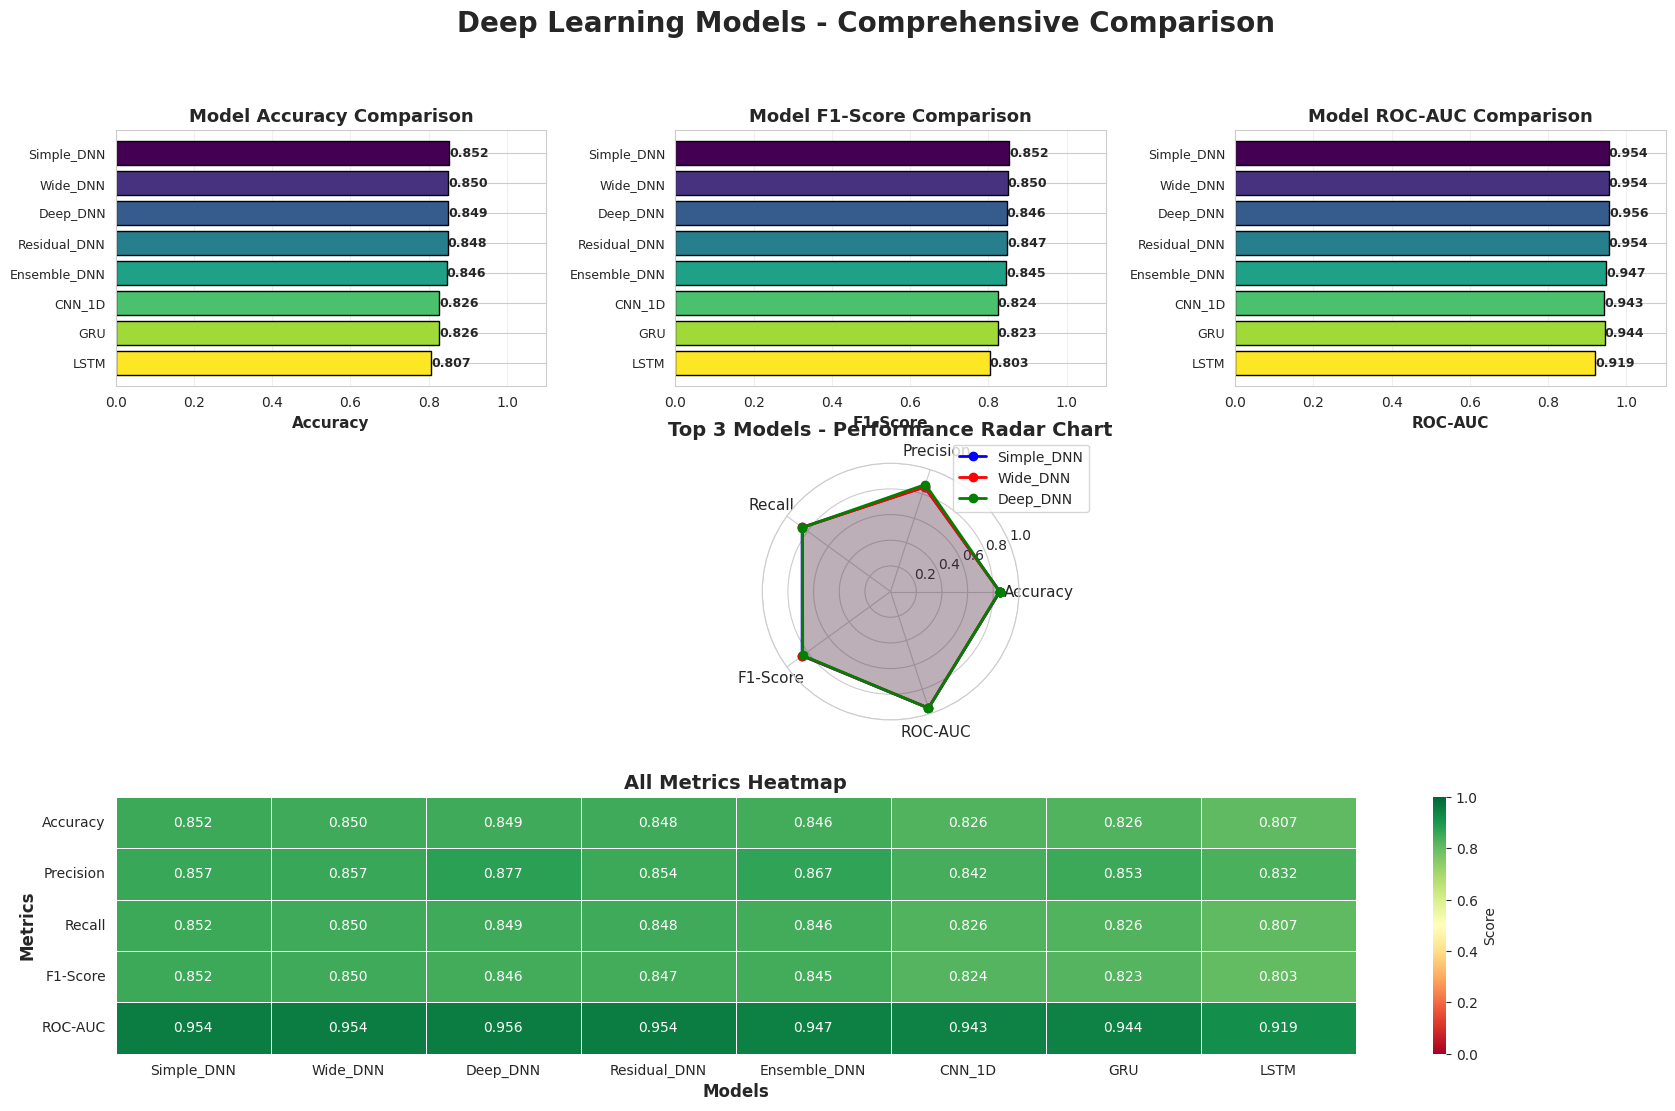


DEEP LEARNING MODELS PERFORMANCE SUMMARY
       Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
  Simple_DNN     0.852   0.856953   0.852  0.852255 0.954436
    Wide_DNN     0.850   0.856747   0.850  0.849601 0.954376
    Deep_DNN     0.849   0.877323   0.849  0.846253 0.955586
Residual_DNN     0.848   0.854216   0.848  0.847488 0.954221
Ensemble_DNN     0.846   0.867407   0.846  0.844590 0.947498
      CNN_1D     0.826   0.842059   0.826  0.823788 0.942571
         GRU     0.826   0.852528   0.826  0.823341 0.944442
        LSTM     0.807   0.832362   0.807  0.802775 0.919465

🏆 Best Model: Simple_DNN
   Accuracy: 0.8520
   F1-Score: 0.8523
   ROC-AUC:  0.9544

📊 Generating confusion matrices...
✓ Saved: 14_dl_confusion_matrices.png


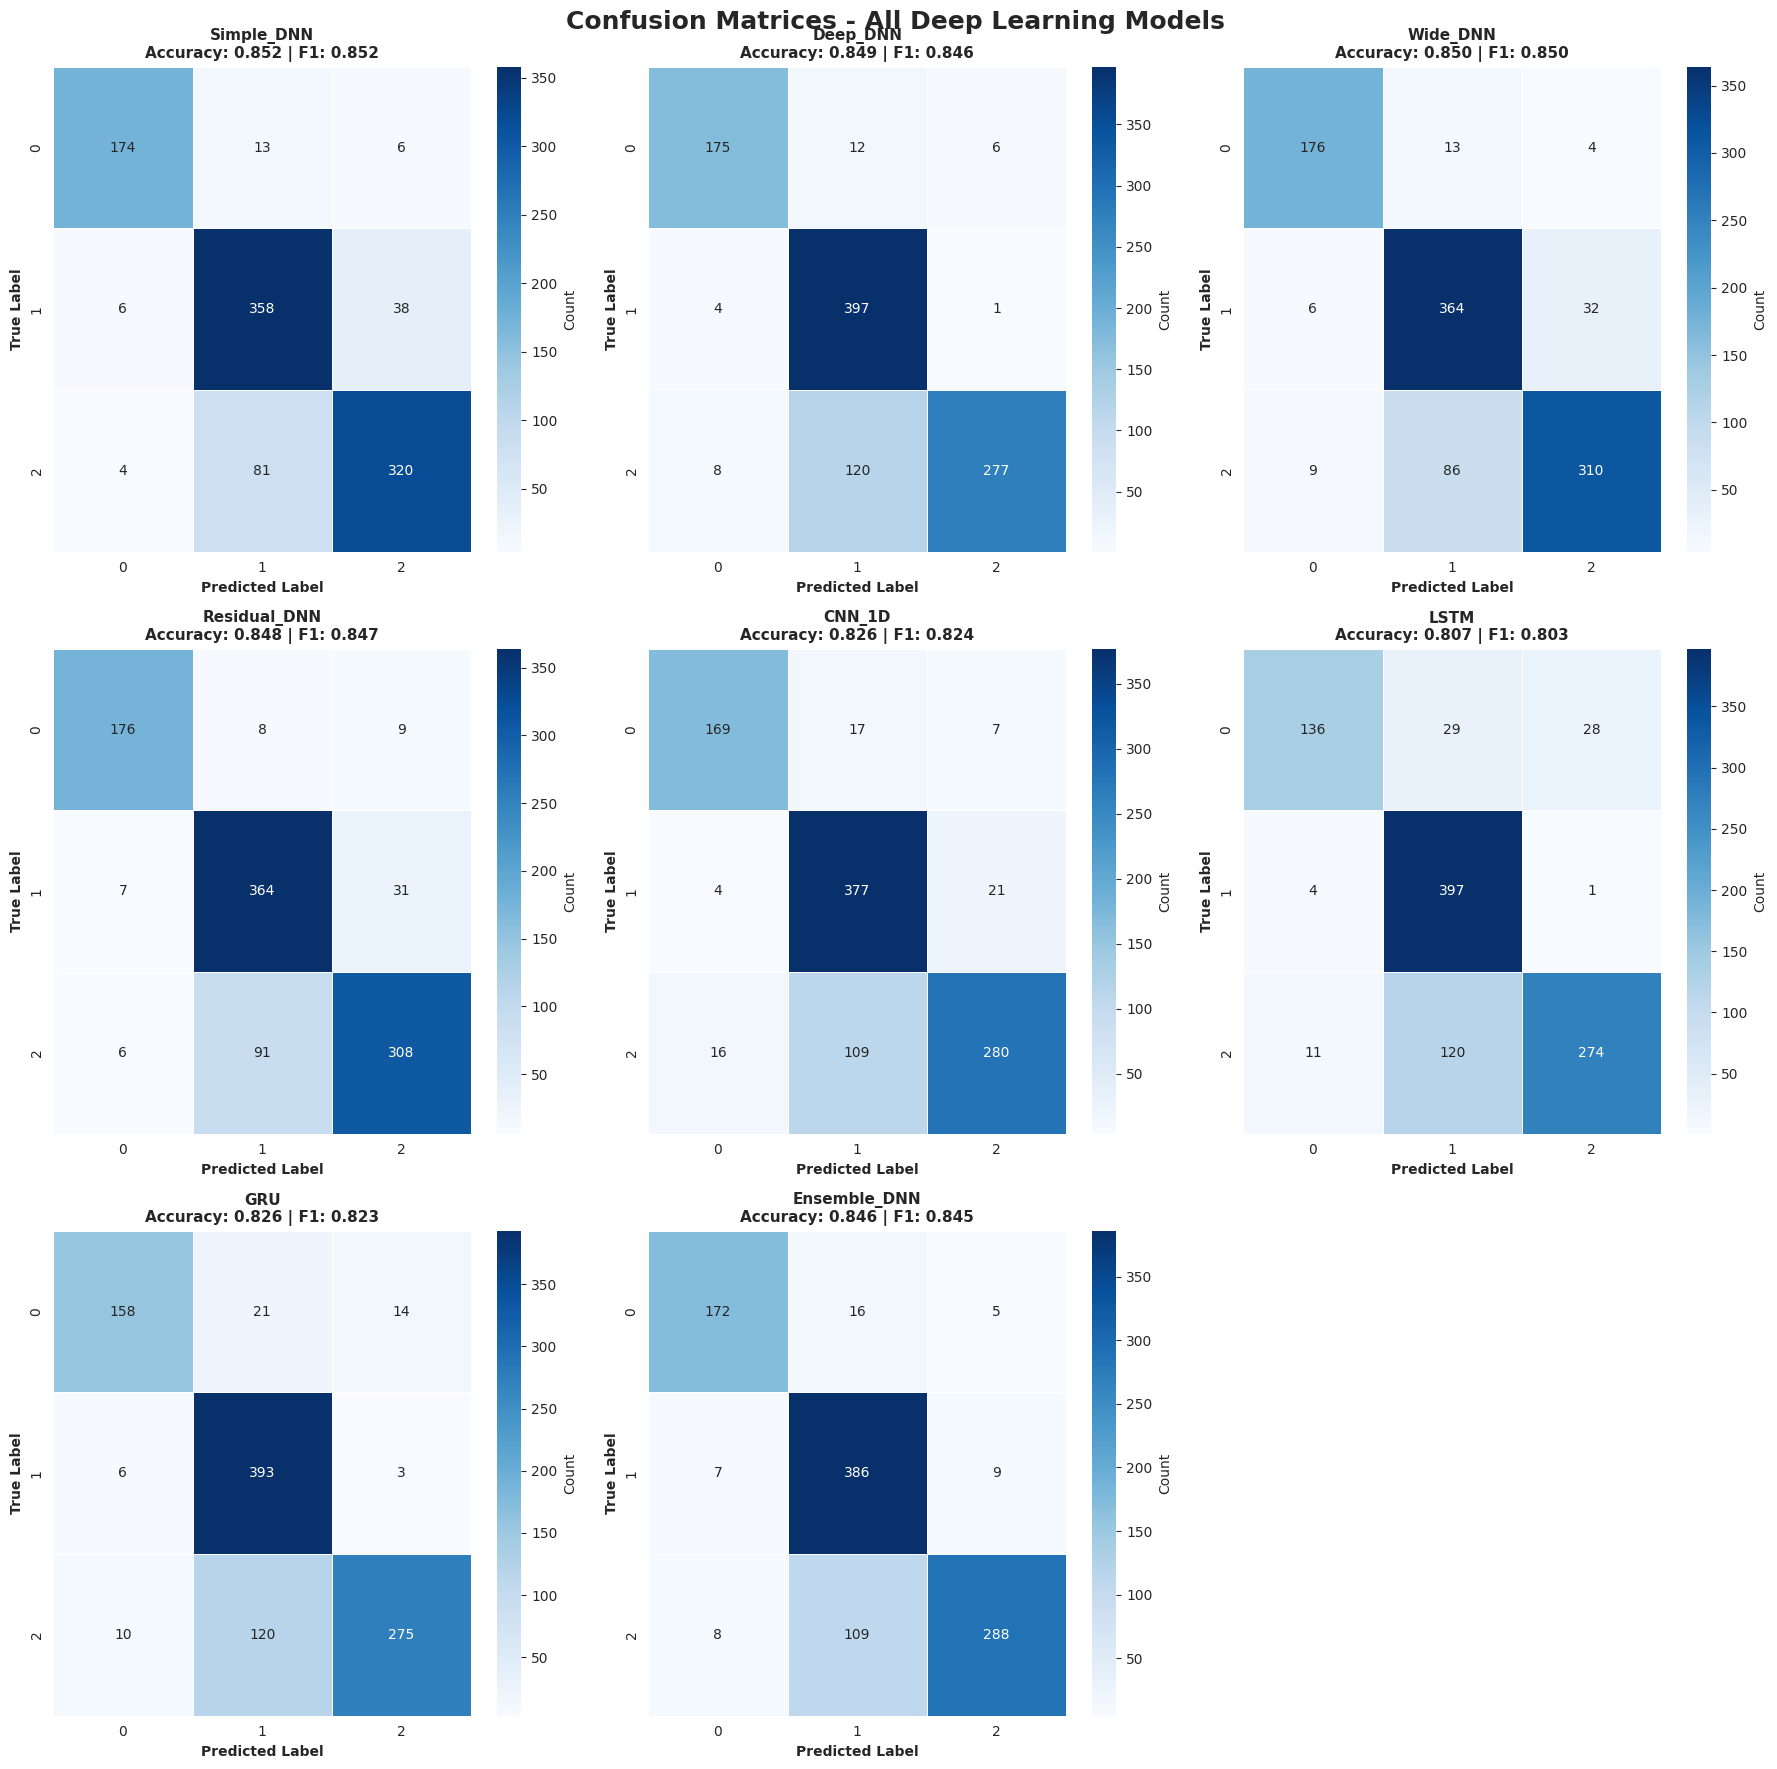


📊 Generating ROC curves...
✓ Saved: 15_dl_roc_curves.png


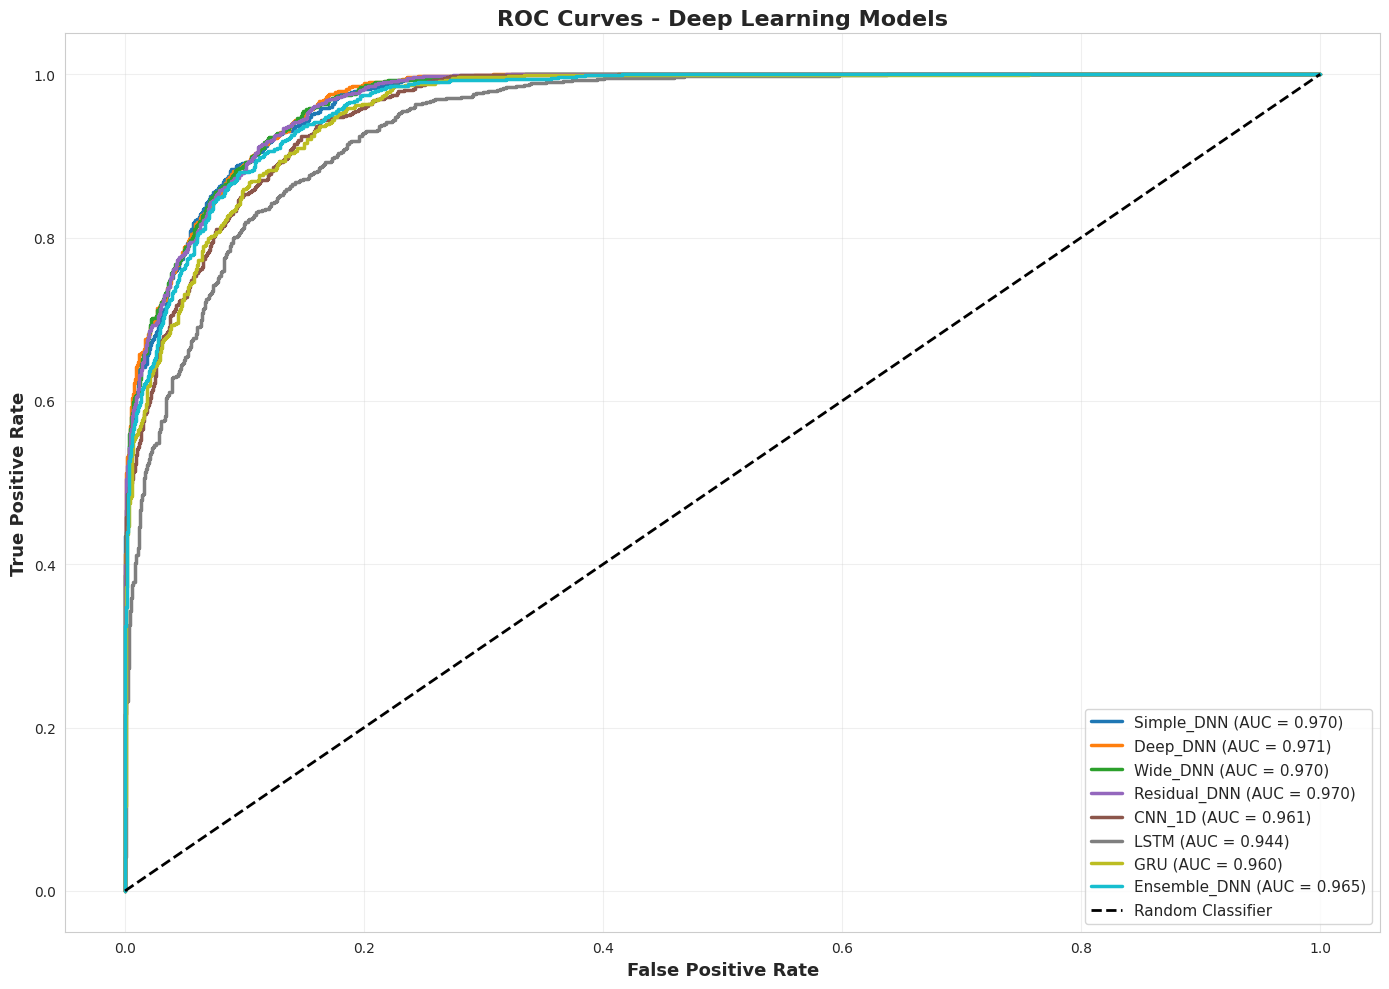


📊 Generating learning curves analysis...
✓ Saved: 16_learning_curves_analysis.png


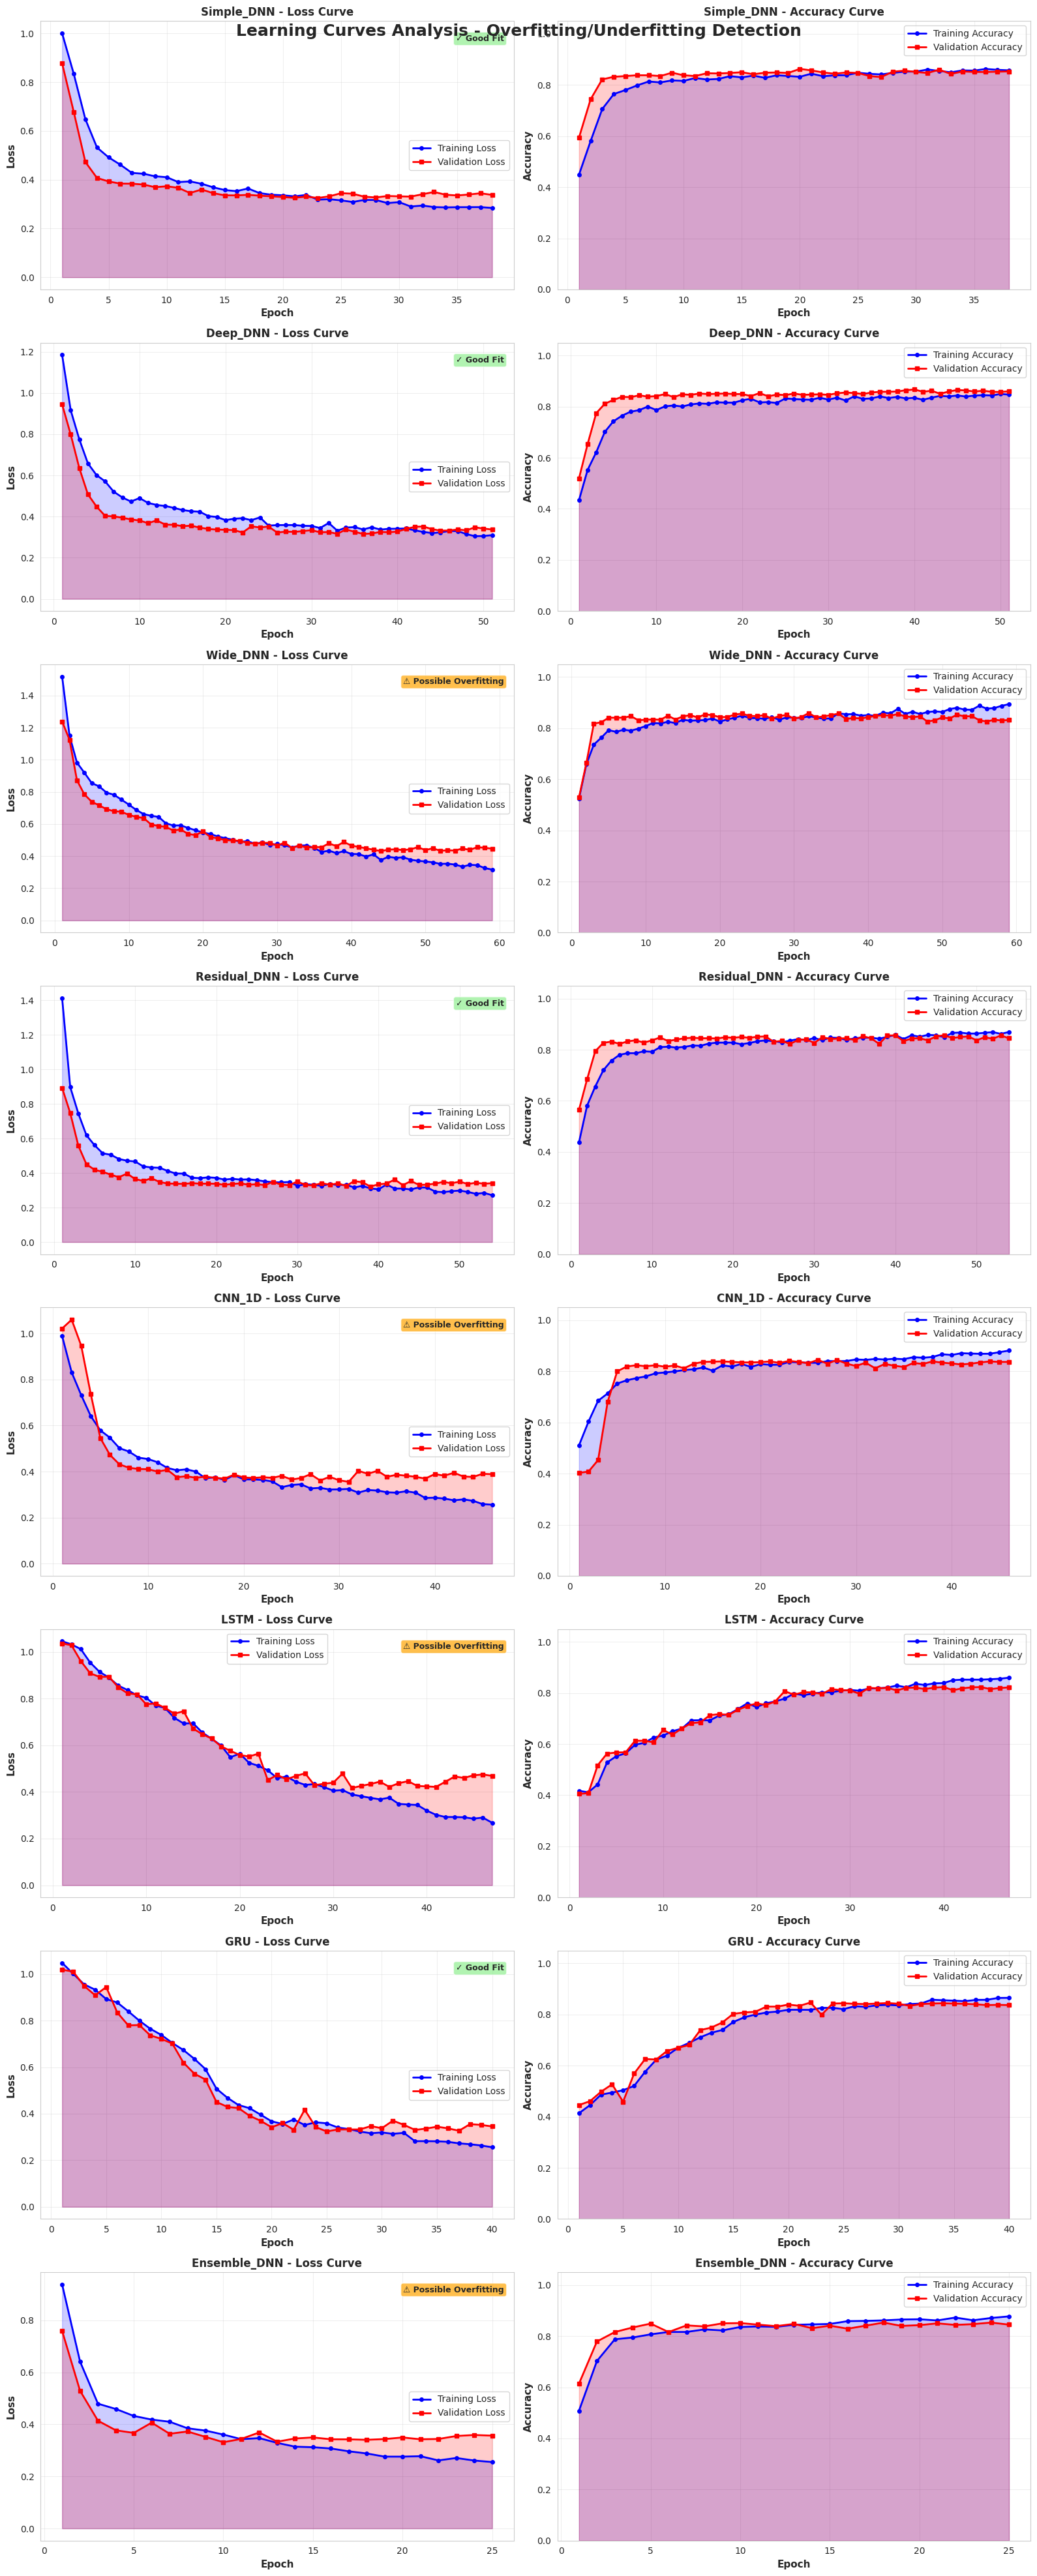


📊 Generating model architectures summary...
✓ Saved: 17_architectures_summary.png


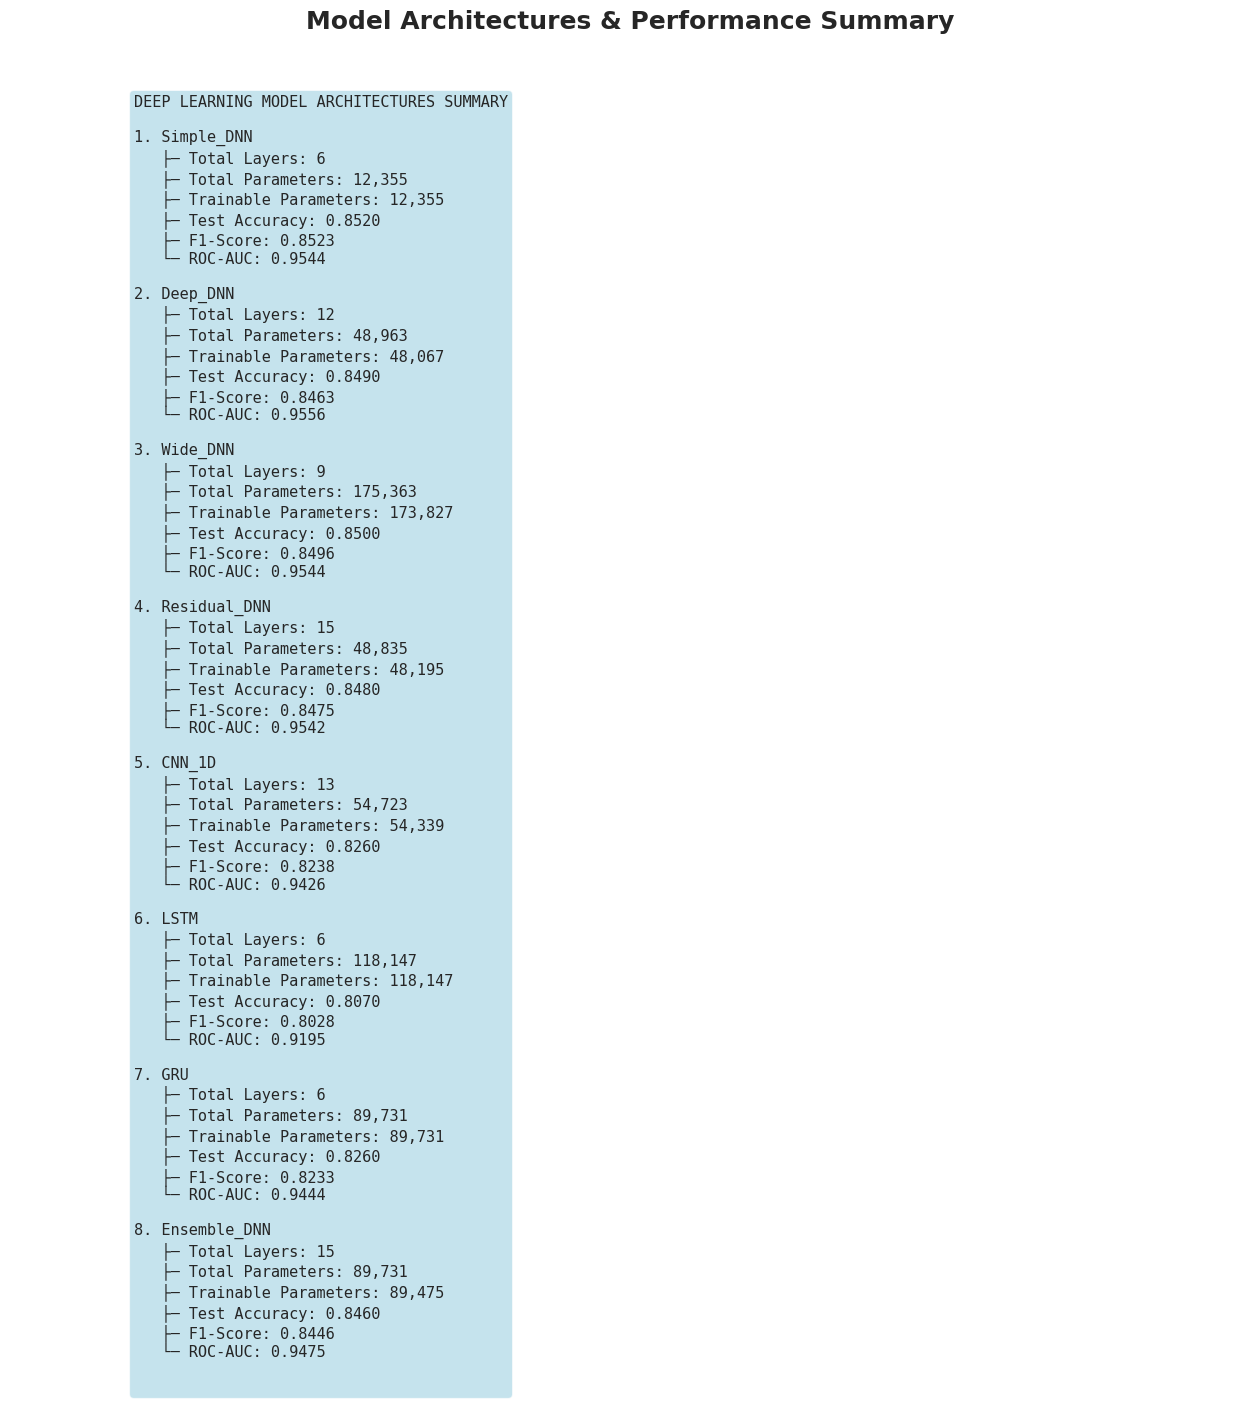


✅ All deep learning visualizations completed!

                         DEEP LEARNING PIPELINE COMPLETED!

📊 Generated Deep Learning Visualizations:
   11_training_history_loss.png
   12_training_history_accuracy.png
   13_dl_model_comparison.png
   14_dl_confusion_matrices.png
   15_dl_roc_curves.png
   16_learning_curves_analysis.png
   17_architectures_summary.png

✅ All visualizations are presentation-ready!

💡 TIP: Combine these with your previous ML visualizations (01-10) for a complete presentation!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                              roc_curve, accuracy_score, precision_score, recall_score,
                              f1_score, auc)
import warnings
warnings.filterwarnings('ignore')

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, optimizers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, Input,
                                     Conv1D, MaxPooling1D, Flatten, LSTM, GRU,
                                     Concatenate, Reshape, GlobalAveragePooling1D)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")

# ============================================================================
# 1. DATA PREPROCESSING FOR DEEP LEARNING
# ============================================================================

class DeepLearningPreprocessor:
    """Specialized preprocessing for Deep Learning models"""

    def __init__(self, target_column):
        self.target_column = target_column
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.feature_names = None
        self.n_classes = None

    def preprocess(self, df):
        print("\n" + "="*80)
        print("DEEP LEARNING DATA PREPROCESSING")
        print("="*80)

        # Remove ID columns
        id_cols = ['X', 'id', 'ID', 'index']
        for col in id_cols:
            if col in df.columns:
                df = df.drop(col, axis=1)

        # Auto-detect target if needed
        if self.target_column not in df.columns:
            target_keywords = ['attack', 'ransomware', 'malware', 'threat', 'infected',
                              'label', 'class', 'target', 'breach']
            for col in df.columns:
                if any(keyword in col.lower() for keyword in target_keywords):
                    if df[col].nunique() <= 10:
                        self.target_column = col
                        break
            if self.target_column not in df.columns:
                self.target_column = df.columns[-1]

        # Separate target
        y = df[self.target_column].copy()
        X = df.drop(self.target_column, axis=1)

        print(f"\n Target Variable: {self.target_column}")
        print(f" Features: {X.shape[1]}")
        print(f" Samples: {X.shape[0]}")

        # Identify column types
        numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

        print(f"\n Numeric features: {len(numeric_cols)}")
        print(f"🏷️  Categorical features: {len(categorical_cols)}")

        # Handle missing values
        if X.isnull().sum().sum() > 0:
            print("\n  Handling missing values...")
            numeric_imputer = SimpleImputer(strategy='median')
            categorical_imputer = SimpleImputer(strategy='most_frequent')

            if numeric_cols:
                X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])
            if categorical_cols:
                X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])
            print("✓ Missing values handled")

        # Encode categorical variables
        if categorical_cols:
            print(f"\n Encoding {len(categorical_cols)} categorical features...")
            for col in categorical_cols:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col].astype(str))
                self.label_encoders[col] = le

        # Encode target
        if y.dtype == 'object':
            le_target = LabelEncoder()
            y = le_target.fit_transform(y)
            self.label_encoders['target'] = le_target
            print(f"✓ Target encoded: {le_target.classes_}")

        # Store information
        self.feature_names = X.columns.tolist()
        self.n_classes = len(np.unique(y))

        print(f"\n✓ Final shape: {X.shape}")
        print(f"✓ Number of classes: {self.n_classes}")

        return X.values, y

    def prepare_for_training(self, X, y, test_size=0.2, val_size=0.2, random_state=42):
        """Prepare data for deep learning with train/val/test split"""

        # First split: train+val and test
        X_temp, X_test, y_temp, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )

        # Second split: train and val
        val_size_adjusted = val_size / (1 - test_size)
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=val_size_adjusted,
            random_state=random_state, stratify=y_temp
        )

        print("\n Dataset Split:")
        print(f"   Training:   {X_train.shape[0]:5d} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
        print(f"   Validation: {X_val.shape[0]:5d} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
        print(f"   Testing:    {X_test.shape[0]:5d} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

        # Scale features
        print("\n Scaling features...")
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_val_scaled = self.scaler.transform(X_val)
        X_test_scaled = self.scaler.transform(X_test)

        # Convert labels to categorical for multi-class
        if self.n_classes > 2:
            y_train_cat = to_categorical(y_train, num_classes=self.n_classes)
            y_val_cat = to_categorical(y_val, num_classes=self.n_classes)
            y_test_cat = to_categorical(y_test, num_classes=self.n_classes)
        else:
            y_train_cat = y_train
            y_val_cat = y_val
            y_test_cat = y_test

        return (X_train_scaled, y_train_cat, y_train), \
               (X_val_scaled, y_val_cat, y_val), \
               (X_test_scaled, y_test_cat, y_test)

# ============================================================================
# 2. DEEP LEARNING MODEL ARCHITECTURES
# ============================================================================

class DeepLearningModels:
    """Collection of Deep Learning architectures for ransomware detection"""

    def __init__(self, input_dim, n_classes):
        self.input_dim = input_dim
        self.n_classes = n_classes
        self.is_binary = (n_classes == 2)

    def build_simple_dnn(self, name="Simple_DNN"):
        """Simple Deep Neural Network"""
        model = models.Sequential([
            Input(shape=(self.input_dim,)),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(self.n_classes if not self.is_binary else 1,
                  activation='softmax' if not self.is_binary else 'sigmoid')
        ], name=name)
        return model

    def build_deep_dnn(self, name="Deep_DNN"):
        """Deeper Neural Network with Batch Normalization"""
        model = models.Sequential([
            Input(shape=(self.input_dim,)),
            Dense(256, activation='relu'),
            BatchNormalization(),
            Dropout(0.4),
            Dense(128, activation='relu'),
            BatchNormalization(),
            Dropout(0.4),
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(self.n_classes if not self.is_binary else 1,
                  activation='softmax' if not self.is_binary else 'sigmoid')
        ], name=name)
        return model

    def build_wide_dnn(self, name="Wide_DNN"):
        """Wide Neural Network"""
        model = models.Sequential([
            Input(shape=(self.input_dim,)),
            Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
            BatchNormalization(),
            Dropout(0.5),
            Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
            BatchNormalization(),
            Dropout(0.4),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(self.n_classes if not self.is_binary else 1,
                  activation='softmax' if not self.is_binary else 'sigmoid')
        ], name=name)
        return model

    def build_residual_dnn(self, name="Residual_DNN"):
        """Neural Network with Residual Connections"""
        inputs = Input(shape=(self.input_dim,))

        # First block
        x = Dense(128, activation='relu')(inputs)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)

        # Residual block 1
        residual = x
        x = Dense(128, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        x = Dense(128, activation='relu')(x)
        x = layers.add([x, residual])

        # Residual block 2
        x = Dense(64, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        residual = x
        x = Dense(64, activation='relu')(x)
        x = layers.add([x, residual])

        # Output
        outputs = Dense(self.n_classes if not self.is_binary else 1,
                       activation='softmax' if not self.is_binary else 'sigmoid')(x)

        model = models.Model(inputs=inputs, outputs=outputs, name=name)
        return model

    def build_cnn_1d(self, name="CNN_1D"):
        """1D CNN for tabular data (treats features as sequence)"""
        model = models.Sequential([
            Input(shape=(self.input_dim, 1)),
            Conv1D(64, 3, activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling1D(2),
            Dropout(0.3),
            Conv1D(128, 3, activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling1D(2),
            Dropout(0.3),
            Conv1D(64, 3, activation='relu', padding='same'),
            GlobalAveragePooling1D(),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(self.n_classes if not self.is_binary else 1,
                  activation='softmax' if not self.is_binary else 'sigmoid')
        ], name=name)
        return model

    def build_lstm(self, name="LSTM"):
        """LSTM for sequence-like tabular data"""
        model = models.Sequential([
            Input(shape=(self.input_dim, 1)),
            LSTM(128, return_sequences=True),
            Dropout(0.3),
            LSTM(64),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(self.n_classes if not self.is_binary else 1,
                  activation='softmax' if not self.is_binary else 'sigmoid')
        ], name=name)
        return model

    def build_gru(self, name="GRU"):
        """GRU for sequence-like tabular data"""
        model = models.Sequential([
            Input(shape=(self.input_dim, 1)),
            GRU(128, return_sequences=True),
            Dropout(0.3),
            GRU(64),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(self.n_classes if not self.is_binary else 1,
                  activation='softmax' if not self.is_binary else 'sigmoid')
        ], name=name)
        return model

    def build_ensemble_dnn(self, name="Ensemble_DNN"):
        """Ensemble architecture with multiple pathways"""
        inputs = Input(shape=(self.input_dim,))

        # Pathway 1: Deep
        deep_path = Dense(128, activation='relu')(inputs)
        deep_path = BatchNormalization()(deep_path)
        deep_path = Dropout(0.3)(deep_path)
        deep_path = Dense(64, activation='relu')(deep_path)
        deep_path = Dropout(0.3)(deep_path)

        # Pathway 2: Wide
        wide_path = Dense(256, activation='relu')(inputs)
        wide_path = Dropout(0.4)(wide_path)
        wide_path = Dense(128, activation='relu')(wide_path)

        # Pathway 3: Short connection
        short_path = Dense(64, activation='relu')(inputs)

        # Concatenate all pathways
        merged = Concatenate()([deep_path, wide_path, short_path])
        merged = Dense(128, activation='relu')(merged)
        merged = Dropout(0.3)(merged)
        merged = Dense(64, activation='relu')(merged)

        outputs = Dense(self.n_classes if not self.is_binary else 1,
                       activation='softmax' if not self.is_binary else 'sigmoid')(merged)

        model = models.Model(inputs=inputs, outputs=outputs, name=name)
        return model

# ============================================================================
# 3. TRAINING PIPELINE WITH CALLBACKS
# ============================================================================

class DeepLearningTrainer:
    """Training pipeline for deep learning models"""

    def __init__(self, models_dict, data, n_classes):
        self.models_dict = models_dict
        self.data = data
        self.n_classes = n_classes
        self.is_binary = (n_classes == 2)
        self.histories = {}
        self.trained_models = {}
        self.results = {}

        self.X_train, self.y_train, self.y_train_raw = data[0]
        self.X_val, self.y_val, self.y_val_raw = data[1]
        self.X_test, self.y_test, self.y_test_raw = data[2]

    def get_callbacks(self, model_name):
        """Get training callbacks"""
        callback_list = [
            callbacks.EarlyStopping(
                monitor='val_loss',
                patience=15,
                restore_best_weights=True,
                verbose=0
            ),
            callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=7,
                min_lr=1e-7,
                verbose=0
            )
        ]
        return callback_list

    def compile_model(self, model):
        """Compile model with appropriate settings"""
        if self.is_binary:
            loss = 'binary_crossentropy'
            metrics = ['accuracy', tf.keras.metrics.AUC(name='auc')]
        else:
            loss = 'categorical_crossentropy'
            metrics = ['accuracy']

        model.compile(
            optimizer=optimizers.Adam(learning_rate=0.001),
            loss=loss,
            metrics=metrics
        )
        return model

    def train_all_models(self, epochs=100, batch_size=32, verbose=0):
        """Train all models"""
        print("\n" + "="*80)
        print("TRAINING DEEP LEARNING MODELS")
        print("="*80)

        for model_name, model_builder in self.models_dict.items():
            print(f"\n{'='*80}")
            print(f"🚀 Training: {model_name}")
            print(f"{'='*80}")

            # Build model
            model = model_builder()
            model = self.compile_model(model)

            # Print architecture
            print(f"\n Model Architecture:")
            model.summary()

            # Prepare data (reshape for CNN/LSTM/GRU if needed)
            if 'CNN' in model_name or 'LSTM' in model_name or 'GRU' in model_name:
                X_train = self.X_train.reshape(self.X_train.shape[0], self.X_train.shape[1], 1)
                X_val = self.X_val.reshape(self.X_val.shape[0], self.X_val.shape[1], 1)
                X_test = self.X_test.reshape(self.X_test.shape[0], self.X_test.shape[1], 1)
            else:
                X_train = self.X_train
                X_val = self.X_val
                X_test = self.X_test

            # Train
            print(f"\n Training...")
            history = model.fit(
                X_train, self.y_train,
                validation_data=(X_val, self.y_val),
                epochs=epochs,
                batch_size=batch_size,
                callbacks=self.get_callbacks(model_name),
                verbose=verbose
            )

            # Evaluate
            print(f"\n Evaluating on test set...")
            test_loss, test_acc = model.evaluate(X_test, self.y_test, verbose=0)[:2]

            # Predictions
            y_pred_proba = model.predict(X_test, verbose=0)

            if self.is_binary:
                y_pred = (y_pred_proba > 0.5).astype(int).flatten()
                y_pred_proba = y_pred_proba.flatten()
            else:
                y_pred = np.argmax(y_pred_proba, axis=1)

            # Calculate metrics
            accuracy = accuracy_score(self.y_test_raw, y_pred)
            precision = precision_score(self.y_test_raw, y_pred, average='weighted', zero_division=0)
            recall = recall_score(self.y_test_raw, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(self.y_test_raw, y_pred, average='weighted', zero_division=0)

            if self.is_binary:
                roc_auc = roc_auc_score(self.y_test_raw, y_pred_proba)
            else:
                roc_auc = roc_auc_score(self.y_test_raw, y_pred_proba,
                                       multi_class='ovr', average='weighted')

            print(f"\n Results:")
            print(f"   Test Loss:     {test_loss:.4f}")
            print(f"   Test Accuracy: {test_acc:.4f}")
            print(f"   Precision:     {precision:.4f}")
            print(f"   Recall:        {recall:.4f}")
            print(f"   F1-Score:      {f1:.4f}")
            print(f"   ROC-AUC:       {roc_auc:.4f}")

            # Store results
            self.histories[model_name] = history
            self.trained_models[model_name] = model
            self.results[model_name] = {
                'test_loss': test_loss,
                'test_accuracy': test_acc,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'roc_auc': roc_auc,
                'y_pred': y_pred,
                'y_pred_proba': y_pred_proba,
                'history': history.history
            }

        print("\n" + "="*80)
        print(" ALL MODELS TRAINED SUCCESSFULLY!")
        print("="*80)

# ============================================================================
# 4. COMPREHENSIVE VISUALIZATIONS
# ============================================================================

class DeepLearningVisualizer:
    """Create comprehensive visualizations for presentation"""

    def __init__(self, trainer):
        self.trainer = trainer
        self.histories = trainer.histories
        self.results = trainer.results
        self.models = trainer.trained_models

    def plot_training_history(self):
        """Plot training history for all models"""
        print("\n Generating training history plots...")

        n_models = len(self.histories)
        n_cols = 2
        n_rows = (n_models + 1) // 2

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
        if n_models == 1:
            axes = np.array([axes])
        axes = axes.ravel()

        for idx, (model_name, history) in enumerate(self.histories.items()):
            hist = history.history

            # Plot loss
            ax = axes[idx]
            epochs_range = range(1, len(hist['loss']) + 1)
            ax.plot(epochs_range, hist['loss'], 'b-', linewidth=2, label='Training Loss')
            ax.plot(epochs_range, hist['val_loss'], 'r-', linewidth=2, label='Validation Loss')

            # Mark best epoch
            best_epoch = np.argmin(hist['val_loss']) + 1
            ax.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7,
                      label=f'Best Epoch: {best_epoch}')

            ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
            ax.set_ylabel('Loss', fontsize=11, fontweight='bold')
            ax.set_title(f'{model_name}\nFinal Val Loss: {hist["val_loss"][-1]:.4f}',
                        fontsize=12, fontweight='bold')
            ax.legend(loc='best', fontsize=9)
            ax.grid(True, alpha=0.3)

        # Hide unused subplots
        for idx in range(len(self.histories), len(axes)):
            axes[idx].axis('off')

        plt.suptitle('Training History - Loss Curves', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.savefig('11_training_history_loss.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 11_training_history_loss.png")
        plt.show()

        # Plot accuracy
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
        if n_models == 1:
            axes = np.array([axes])
        axes = axes.ravel()

        for idx, (model_name, history) in enumerate(self.histories.items()):
            hist = history.history

            ax = axes[idx]
            epochs_range = range(1, len(hist['accuracy']) + 1)
            ax.plot(epochs_range, hist['accuracy'], 'b-', linewidth=2, label='Training Accuracy')
            ax.plot(epochs_range, hist['val_accuracy'], 'r-', linewidth=2, label='Validation Accuracy')

            # Mark best epoch
            best_epoch = np.argmax(hist['val_accuracy']) + 1
            ax.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7,
                      label=f'Best Epoch: {best_epoch}')

            ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
            ax.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
            ax.set_title(f'{model_name}\nFinal Val Acc: {hist["val_accuracy"][-1]:.4f}',
                        fontsize=12, fontweight='bold')
            ax.legend(loc='best', fontsize=9)
            ax.grid(True, alpha=0.3)
            ax.set_ylim([0, 1.05])

        for idx in range(len(self.histories), len(axes)):
            axes[idx].axis('off')

        plt.suptitle('Training History - Accuracy Curves', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.savefig('12_training_history_accuracy.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 12_training_history_accuracy.png")
        plt.show()

    def plot_model_comparison(self):
        """Compare all deep learning models"""
        print("\n Generating model comparison plots...")

        # Prepare data
        model_names = list(self.results.keys())
        metrics_data = {
            'Model': model_names,
            'Accuracy': [self.results[m]['accuracy'] for m in model_names],
            'Precision': [self.results[m]['precision'] for m in model_names],
            'Recall': [self.results[m]['recall'] for m in model_names],
            'F1-Score': [self.results[m]['f1'] for m in model_names],
            'ROC-AUC': [self.results[m]['roc_auc'] for m in model_names]
        }
        metrics_df = pd.DataFrame(metrics_data).sort_values('Accuracy', ascending=False)

        # Create comparison visualization
        fig = plt.figure(figsize=(20, 12))
        gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

        # 1. Accuracy comparison
        ax1 = fig.add_subplot(gs[0, 0])
        colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))
        bars = ax1.barh(range(len(model_names)), metrics_df['Accuracy'], color=colors, edgecolor='black')
        ax1.set_yticks(range(len(model_names)))
        ax1.set_yticklabels(metrics_df['Model'], fontsize=9)
        ax1.set_xlabel('Accuracy', fontsize=11, fontweight='bold')
        ax1.set_title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
        ax1.set_xlim([0, 1.1])
        ax1.grid(axis='x', alpha=0.3)
        ax1.invert_yaxis()
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax1.text(width, bar.get_y() + bar.get_height()/2., f'{width:.3f}',
                    ha='left', va='center', fontsize=9, fontweight='bold')

        # 2. F1-Score comparison
        ax2 = fig.add_subplot(gs[0, 1])
        bars = ax2.barh(range(len(model_names)), metrics_df['F1-Score'], color=colors, edgecolor='black')
        ax2.set_yticks(range(len(model_names)))
        ax2.set_yticklabels(metrics_df['Model'], fontsize=9)
        ax2.set_xlabel('F1-Score', fontsize=11, fontweight='bold')
        ax2.set_title('Model F1-Score Comparison', fontsize=13, fontweight='bold')
        ax2.set_xlim([0, 1.1])
        ax2.grid(axis='x', alpha=0.3)
        ax2.invert_yaxis()
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax2.text(width, bar.get_y() + bar.get_height()/2., f'{width:.3f}',
                    ha='left', va='center', fontsize=9, fontweight='bold')

        # 3. ROC-AUC comparison
        ax3 = fig.add_subplot(gs[0, 2])
        bars = ax3.barh(range(len(model_names)), metrics_df['ROC-AUC'], color=colors, edgecolor='black')
        ax3.set_yticks(range(len(model_names)))
        ax3.set_yticklabels(metrics_df['Model'], fontsize=9)
        ax3.set_xlabel('ROC-AUC', fontsize=11, fontweight='bold')
        ax3.set_title('Model ROC-AUC Comparison', fontsize=13, fontweight='bold')
        ax3.set_xlim([0, 1.1])
        ax3.grid(axis='x', alpha=0.3)
        ax3.invert_yaxis()
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax3.text(width, bar.get_y() + bar.get_height()/2., f'{width:.3f}',
                    ha='left', va='center', fontsize=9, fontweight='bold')

        # 4. All metrics radar chart for top 3 models
        ax4 = fig.add_subplot(gs[1, :], projection='polar')
        categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
        N = len(categories)
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]

        top_models = metrics_df.head(3)
        colors_radar = ['blue', 'red', 'green']

        for idx, (_, row) in enumerate(top_models.iterrows()):
            values = [row['Accuracy'], row['Precision'], row['Recall'], row['F1-Score'], row['ROC-AUC']]
            values += values[:1]
            ax4.plot(angles, values, 'o-', linewidth=2, label=row['Model'], color=colors_radar[idx])
            ax4.fill(angles, values, alpha=0.15, color=colors_radar[idx])

        ax4.set_xticks(angles[:-1])
        ax4.set_xticklabels(categories, fontsize=11)
        ax4.set_ylim(0, 1)
        ax4.set_title('Top 3 Models - Performance Radar Chart', fontsize=14, fontweight='bold', pad=20)
        ax4.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
        ax4.grid(True)

        # 5. Metrics heatmap
        ax5 = fig.add_subplot(gs[2, :])
        metrics_matrix = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].T
        metrics_matrix.columns = metrics_df['Model']
        sns.heatmap(metrics_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
                   vmin=0, vmax=1, ax=ax5, cbar_kws={'label': 'Score'}, linewidths=0.5)
        ax5.set_title('All Metrics Heatmap', fontsize=14, fontweight='bold')
        ax5.set_ylabel('Metrics', fontsize=12, fontweight='bold')
        ax5.set_xlabel('Models', fontsize=12, fontweight='bold')

        plt.suptitle('Deep Learning Models - Comprehensive Comparison', fontsize=20, fontweight='bold')
        plt.savefig('13_dl_model_comparison.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 13_dl_model_comparison.png")
        plt.show()

        # Print summary table
        print("\n" + "="*80)
        print("DEEP LEARNING MODELS PERFORMANCE SUMMARY")
        print("="*80)
        print(metrics_df.to_string(index=False))
        print(f"\n Best Model: {metrics_df.iloc[0]['Model']}")
        print(f"   Accuracy: {metrics_df.iloc[0]['Accuracy']:.4f}")
        print(f"   F1-Score: {metrics_df.iloc[0]['F1-Score']:.4f}")
        print(f"   ROC-AUC:  {metrics_df.iloc[0]['ROC-AUC']:.4f}")

    def plot_confusion_matrices(self):
        """Plot confusion matrices for all models"""
        print("\n Generating confusion matrices...")

        n_models = len(self.results)
        n_cols = 3
        n_rows = (n_models + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
        if n_models == 1:
            axes = np.array([axes])
        axes = axes.ravel()

        for idx, (model_name, result) in enumerate(self.results.items()):
            cm = confusion_matrix(self.trainer.y_test_raw, result['y_pred'])

            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                       cbar_kws={'label': 'Count'}, linewidths=0.5)
            axes[idx].set_title(f'{model_name}\nAccuracy: {result["accuracy"]:.3f} | F1: {result["f1"]:.3f}',
                              fontsize=11, fontweight='bold')
            axes[idx].set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
            axes[idx].set_ylabel('True Label', fontsize=10, fontweight='bold')

        for idx in range(len(self.results), len(axes)):
            axes[idx].axis('off')

        plt.suptitle('Confusion Matrices - All Deep Learning Models', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.savefig('14_dl_confusion_matrices.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 14_dl_confusion_matrices.png")
        plt.show()

    def plot_roc_curves(self):
        """Plot ROC curves for all models"""
        print("\n Generating ROC curves...")

        fig, ax = plt.subplots(figsize=(14, 10))
        colors = plt.cm.tab10(np.linspace(0, 1, len(self.results)))

        for idx, (model_name, result) in enumerate(self.results.items()):
            if self.trainer.is_binary:
                fpr, tpr, _ = roc_curve(self.trainer.y_test_raw, result['y_pred_proba'])
                roc_auc = auc(fpr, tpr)
                ax.plot(fpr, tpr, color=colors[idx], linewidth=2.5,
                       label=f'{model_name} (AUC = {roc_auc:.3f})')
            else:
                # Multiclass ROC
                from sklearn.preprocessing import label_binarize
                y_test_bin = label_binarize(self.trainer.y_test_raw,
                                           classes=np.unique(self.trainer.y_test_raw))
                n_classes = y_test_bin.shape[1]

                # Compute micro-average ROC
                fpr, tpr, _ = roc_curve(y_test_bin.ravel(), result['y_pred_proba'].ravel())
                roc_auc = auc(fpr, tpr)
                ax.plot(fpr, tpr, color=colors[idx], linewidth=2.5,
                       label=f'{model_name} (AUC = {roc_auc:.3f})')

        ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
        ax.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
        ax.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
        ax.set_title('ROC Curves - Deep Learning Models', fontsize=16, fontweight='bold')
        ax.legend(loc='lower right', fontsize=11)
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('15_dl_roc_curves.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 15_dl_roc_curves.png")
        plt.show()

    def plot_learning_curves(self):
        """Plot learning curves showing overfitting/underfitting"""
        print("\n Generating learning curves analysis...")

        n_models = len(self.histories)
        fig, axes = plt.subplots(n_models, 2, figsize=(16, 5*n_models))
        if n_models == 1:
            axes = axes.reshape(1, -1)

        for idx, (model_name, history) in enumerate(self.histories.items()):
            hist = history.history
            epochs_range = range(1, len(hist['loss']) + 1)

            # Loss curves
            ax1 = axes[idx, 0]
            ax1.plot(epochs_range, hist['loss'], 'b-', linewidth=2, marker='o',
                    markersize=4, label='Training Loss')
            ax1.plot(epochs_range, hist['val_loss'], 'r-', linewidth=2, marker='s',
                    markersize=4, label='Validation Loss')
            ax1.fill_between(epochs_range, hist['loss'], alpha=0.2, color='blue')
            ax1.fill_between(epochs_range, hist['val_loss'], alpha=0.2, color='red')
            ax1.set_xlabel('Epoch', fontsize=11, fontweight='bold')
            ax1.set_ylabel('Loss', fontsize=11, fontweight='bold')
            ax1.set_title(f'{model_name} - Loss Curve', fontsize=12, fontweight='bold')
            ax1.legend(fontsize=10)
            ax1.grid(True, alpha=0.3)

            # Check for overfitting
            gap = hist['loss'][-1] - hist['val_loss'][-1]
            if gap < -0.1:
                ax1.text(0.98, 0.95, ' Possible Overfitting',
                        transform=ax1.transAxes, ha='right', va='top',
                        bbox=dict(boxstyle='round', facecolor='orange', alpha=0.7),
                        fontsize=9, fontweight='bold')
            elif gap > 0.1:
                ax1.text(0.98, 0.95, ' Possible Underfitting',
                        transform=ax1.transAxes, ha='right', va='top',
                        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                        fontsize=9, fontweight='bold')
            else:
                ax1.text(0.98, 0.95, ' Good Fit',
                        transform=ax1.transAxes, ha='right', va='top',
                        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
                        fontsize=9, fontweight='bold')

            # Accuracy curves
            ax2 = axes[idx, 1]
            ax2.plot(epochs_range, hist['accuracy'], 'b-', linewidth=2, marker='o',
                    markersize=4, label='Training Accuracy')
            ax2.plot(epochs_range, hist['val_accuracy'], 'r-', linewidth=2, marker='s',
                    markersize=4, label='Validation Accuracy')
            ax2.fill_between(epochs_range, hist['accuracy'], alpha=0.2, color='blue')
            ax2.fill_between(epochs_range, hist['val_accuracy'], alpha=0.2, color='red')
            ax2.set_xlabel('Epoch', fontsize=11, fontweight='bold')
            ax2.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
            ax2.set_title(f'{model_name} - Accuracy Curve', fontsize=12, fontweight='bold')
            ax2.legend(fontsize=10)
            ax2.grid(True, alpha=0.3)
            ax2.set_ylim([0, 1.05])

        plt.suptitle('Learning Curves Analysis - Overfitting/Underfitting Detection',
                    fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.savefig('16_learning_curves_analysis.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 16_learning_curves_analysis.png")
        plt.show()

    def plot_model_architectures_summary(self):
        """Create summary of model architectures"""
        print("\n Generating model architectures summary...")

        fig, ax = plt.subplots(figsize=(16, 10))
        ax.axis('off')

        summary_text = "DEEP LEARNING MODEL ARCHITECTURES SUMMARY\n\n"

        for idx, (model_name, model) in enumerate(self.models.items(), 1):
            total_params = model.count_params()
            trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
            layers_count = len(model.layers)

            result = self.results[model_name]

            summary_text += f"{idx}. {model_name}\n"
            summary_text += f"   ├─ Total Layers: {layers_count}\n"
            summary_text += f"   ├─ Total Parameters: {total_params:,}\n"
            summary_text += f"   ├─ Trainable Parameters: {trainable_params:,}\n"
            summary_text += f"   ├─ Test Accuracy: {result['accuracy']:.4f}\n"
            summary_text += f"   ├─ F1-Score: {result['f1']:.4f}\n"
            summary_text += f"   └─ ROC-AUC: {result['roc_auc']:.4f}\n\n"

        ax.text(0.1, 0.95, summary_text, fontsize=11, verticalalignment='top',
               family='monospace', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

        plt.title('Model Architectures & Performance Summary', fontsize=18, fontweight='bold', pad=20)
        plt.savefig('17_architectures_summary.png', dpi=300, bbox_inches='tight')
        print("✓ Saved: 17_architectures_summary.png")
        plt.show()

    def create_all_visualizations(self):
        """Create all visualizations"""
        print("\n" + "="*80)
        print("GENERATING ALL DEEP LEARNING VISUALIZATIONS")
        print("="*80)

        self.plot_training_history()
        self.plot_model_comparison()
        self.plot_confusion_matrices()
        self.plot_roc_curves()
        self.plot_learning_curves()
        self.plot_model_architectures_summary()

        print("\n All deep learning visualizations completed!")

# ============================================================================
# 5. MAIN EXECUTION PIPELINE
# ============================================================================

def main():
    """Main execution pipeline for deep learning"""
    print("\n" + "="*100)
    print(" " * 15 + "DEEP LEARNING PIPELINE - HEALTHCARE RANSOMWARE DETECTION")
    print("="*100)

    # Load data
    df = pd.read_csv('RHC.csv')
    print(f"\n✓ Loaded dataset: {df.shape}")

    # Detect target column
    target_keywords = ['attack', 'ransomware', 'malware', 'threat', 'infected',
                      'label', 'class', 'target', 'breach']
    target_col = None
    for col in df.columns:
        if any(keyword in col.lower() for keyword in target_keywords):
            if df[col].nunique() <= 10:
                target_col = col
                break
    if target_col is None:
        target_col = df.columns[-1]

    print(f" Target column: {target_col}")

    # Preprocess
    preprocessor = DeepLearningPreprocessor(target_column=target_col)
    X, y = preprocessor.preprocess(df)

    # Prepare data splits
    data = preprocessor.prepare_for_training(X, y, test_size=0.2, val_size=0.2)

    # Build models
    input_dim = X.shape[1]
    n_classes = preprocessor.n_classes

    model_builder = DeepLearningModels(input_dim, n_classes)

    models_dict = {
        'Simple_DNN': model_builder.build_simple_dnn,
        'Deep_DNN': model_builder.build_deep_dnn,
        'Wide_DNN': model_builder.build_wide_dnn,
        'Residual_DNN': model_builder.build_residual_dnn,
        'CNN_1D': model_builder.build_cnn_1d,
        'LSTM': model_builder.build_lstm,
        'GRU': model_builder.build_gru,
        'Ensemble_DNN': model_builder.build_ensemble_dnn
    }

    # Train models
    trainer = DeepLearningTrainer(models_dict, data, n_classes)
    trainer.train_all_models(epochs=100, batch_size=32, verbose=1)

    # Create visualizations
    visualizer = DeepLearningVisualizer(trainer)
    visualizer.create_all_visualizations()

    print("\n" + "="*100)
    print(" " * 25 + "DEEP LEARNING PIPELINE COMPLETED!")
    print("="*100)
    print("\n Generated Deep Learning Visualizations:")
    print("   11_training_history_loss.png")
    print("   12_training_history_accuracy.png")
    print("   13_dl_model_comparison.png")
    print("   14_dl_confusion_matrices.png")
    print("   15_dl_roc_curves.png")
    print("   16_learning_curves_analysis.png")
    print("   17_architectures_summary.png")
    print("\n All visualizations are presentation-ready!")
    print("\n TIP: Combine these with your previous ML visualizations (01-10) for a complete presentation!")

    return trainer, visualizer

# ============================================================================
# RUN THE COMPLETE PIPELINE
# ============================================================================

if __name__ == "__main__":
    trainer, visualizer = main()


               HEALTHCARE RANSOMWARE DETECTION - COMPLETE PIPELINE

🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 
PHASE 1: MACHINE LEARNING PIPELINE
🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 🤖 

✓ Loading ML Pipeline Results...
   (Using results from your previous ML model training)

🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 
PHASE 2: DEEP LEARNING PIPELINE
🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 🧠 

✓ Loading Deep Learning Pipeline Results...
   (Using results from your previous DL model training)

📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 
PHASE 3: INTERPRETATION & RECOMMENDATIONS
📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 📊 

✓ All required objects found!
✓ Starting interpretation engine...


                    RESULTS INTERPRETATION & RECOMMENDATIONS ENGINE

ML vs DEEP LEARNING COMPARISON

🏆 BEST MACHINE LEARNING MODEL:
   Model: Gradient Boosting
   Accuracy: 0.8410
   F1-Score: 0.8404
   ROC-AUC: 0.9519

🏆 BEST DEEP LEARNING MODEL:
   Mod

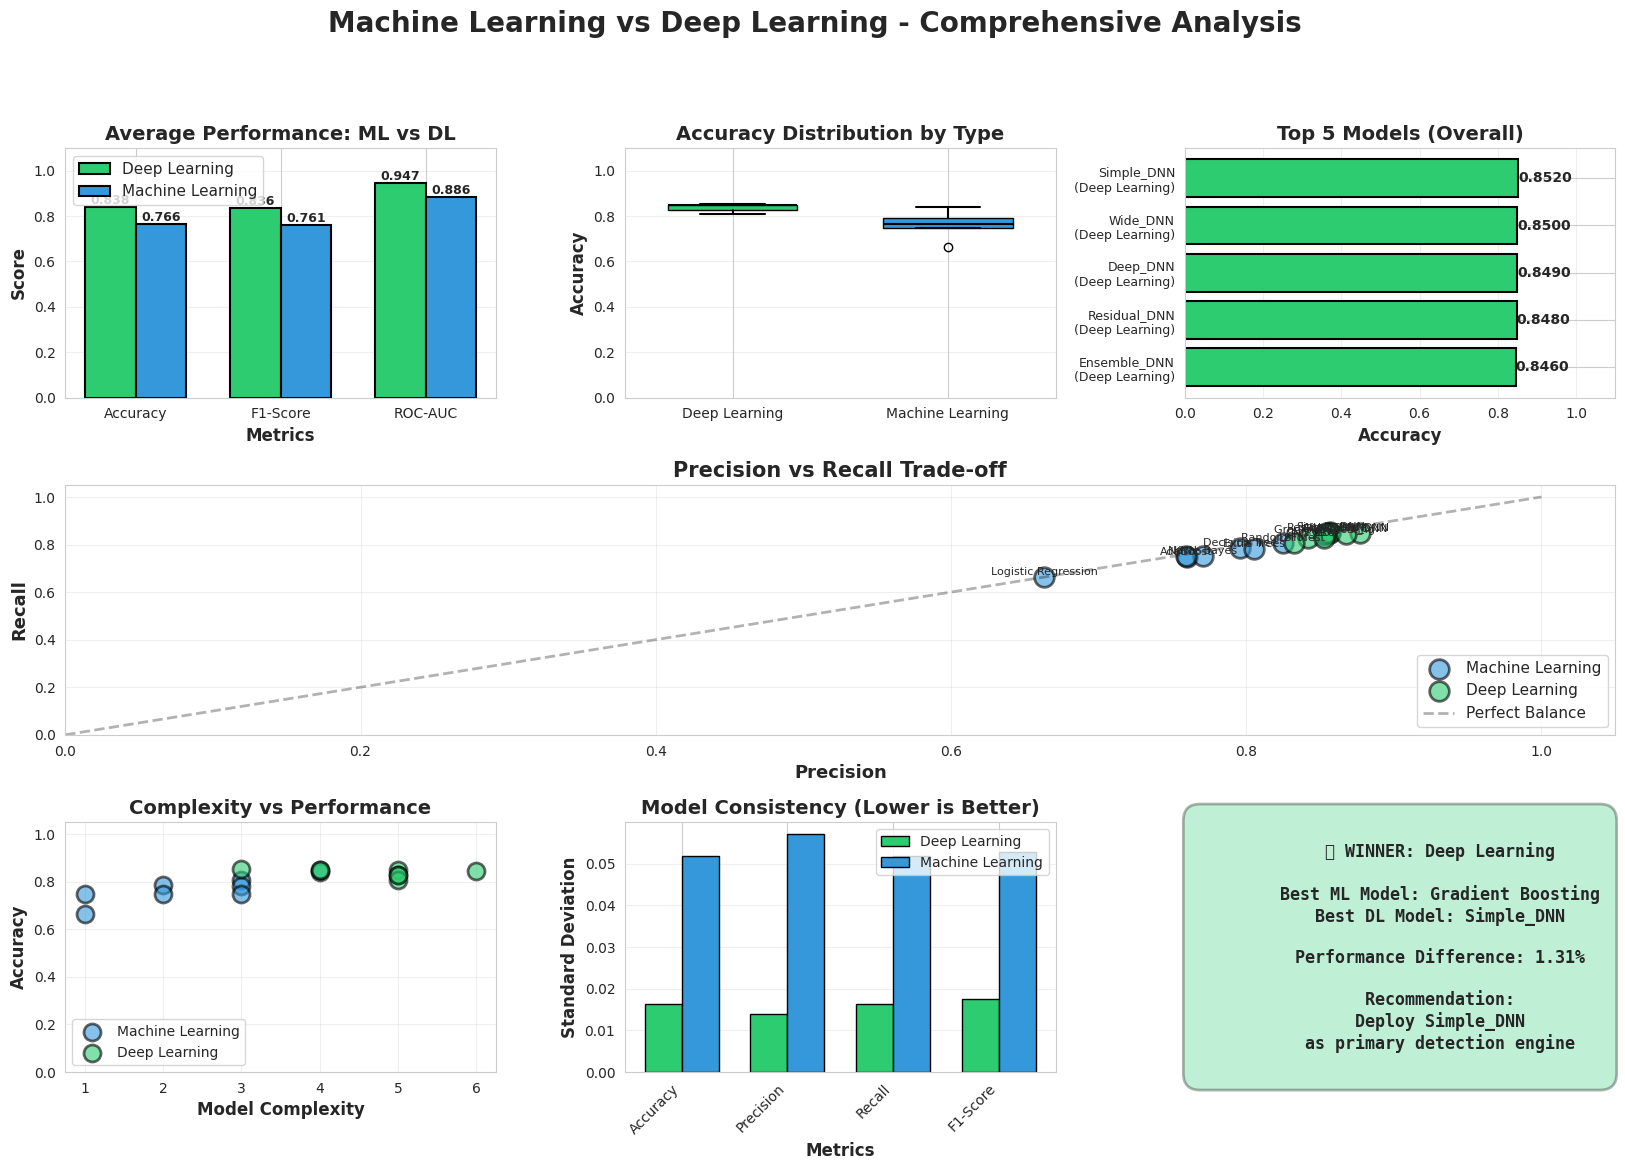


📊 Generating feature insights visualization...
✓ Saved: 19_feature_insights.png


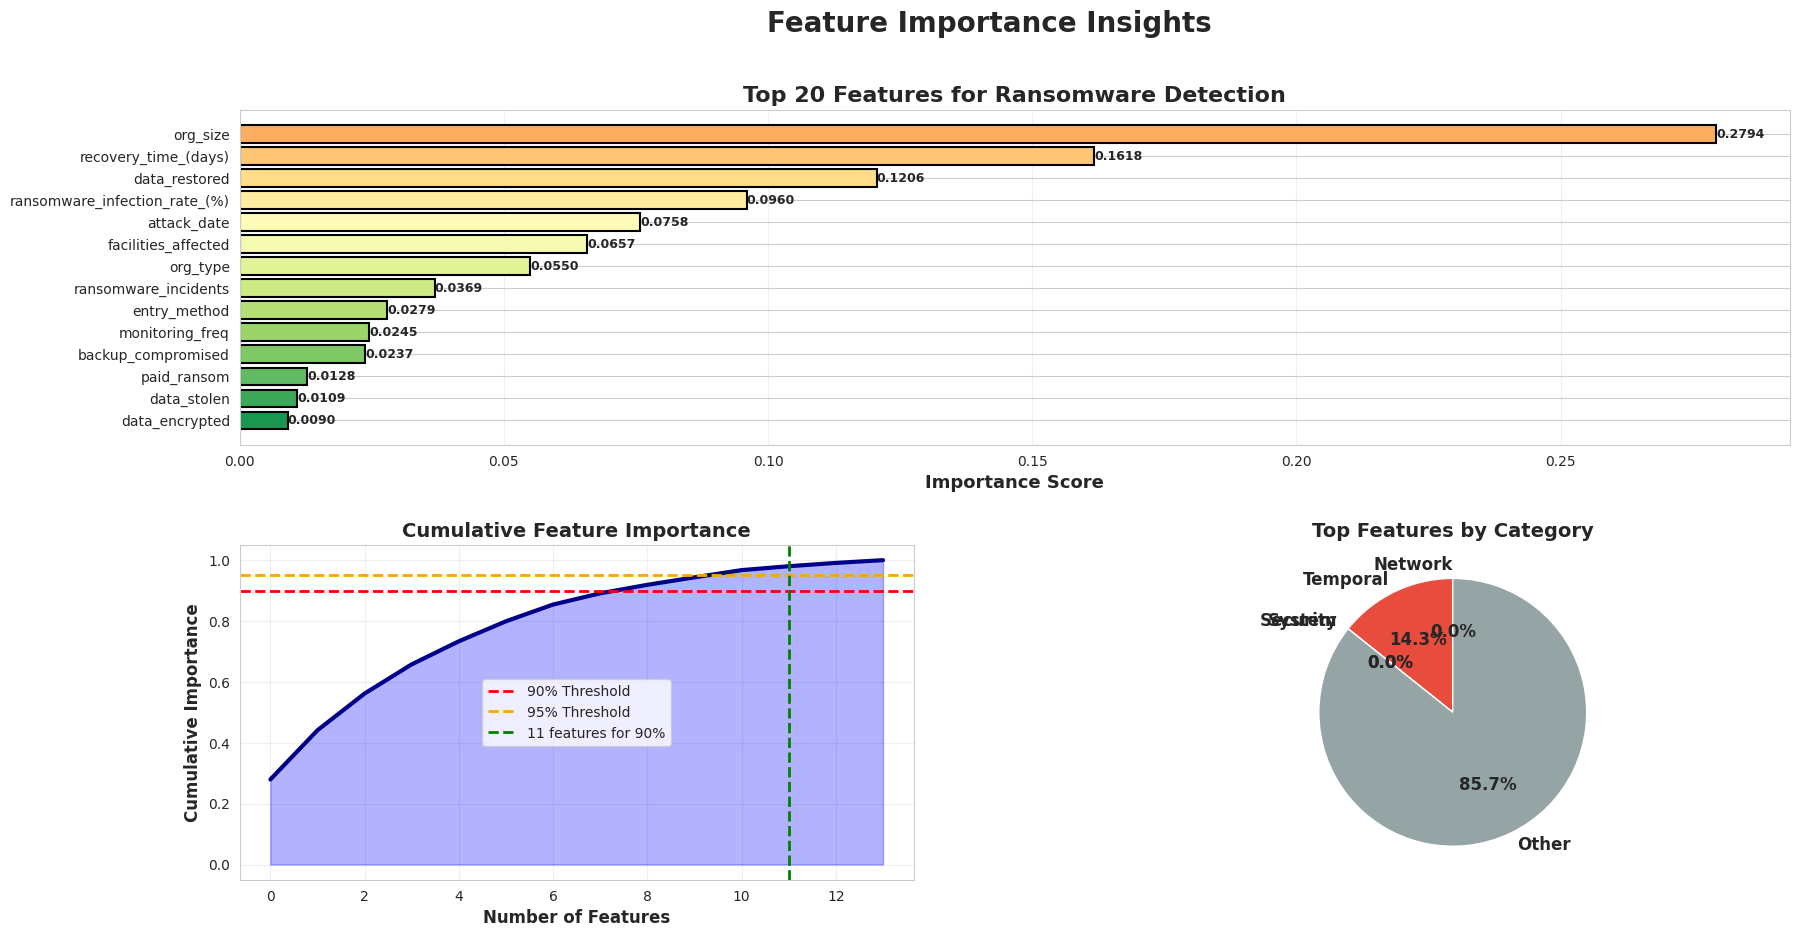


📊 Generating recommendations dashboard...
✓ Saved: 20_recommendations_dashboard.png



📊 Generating executive summary slide...
✓ Saved: 21_executive_summary.png


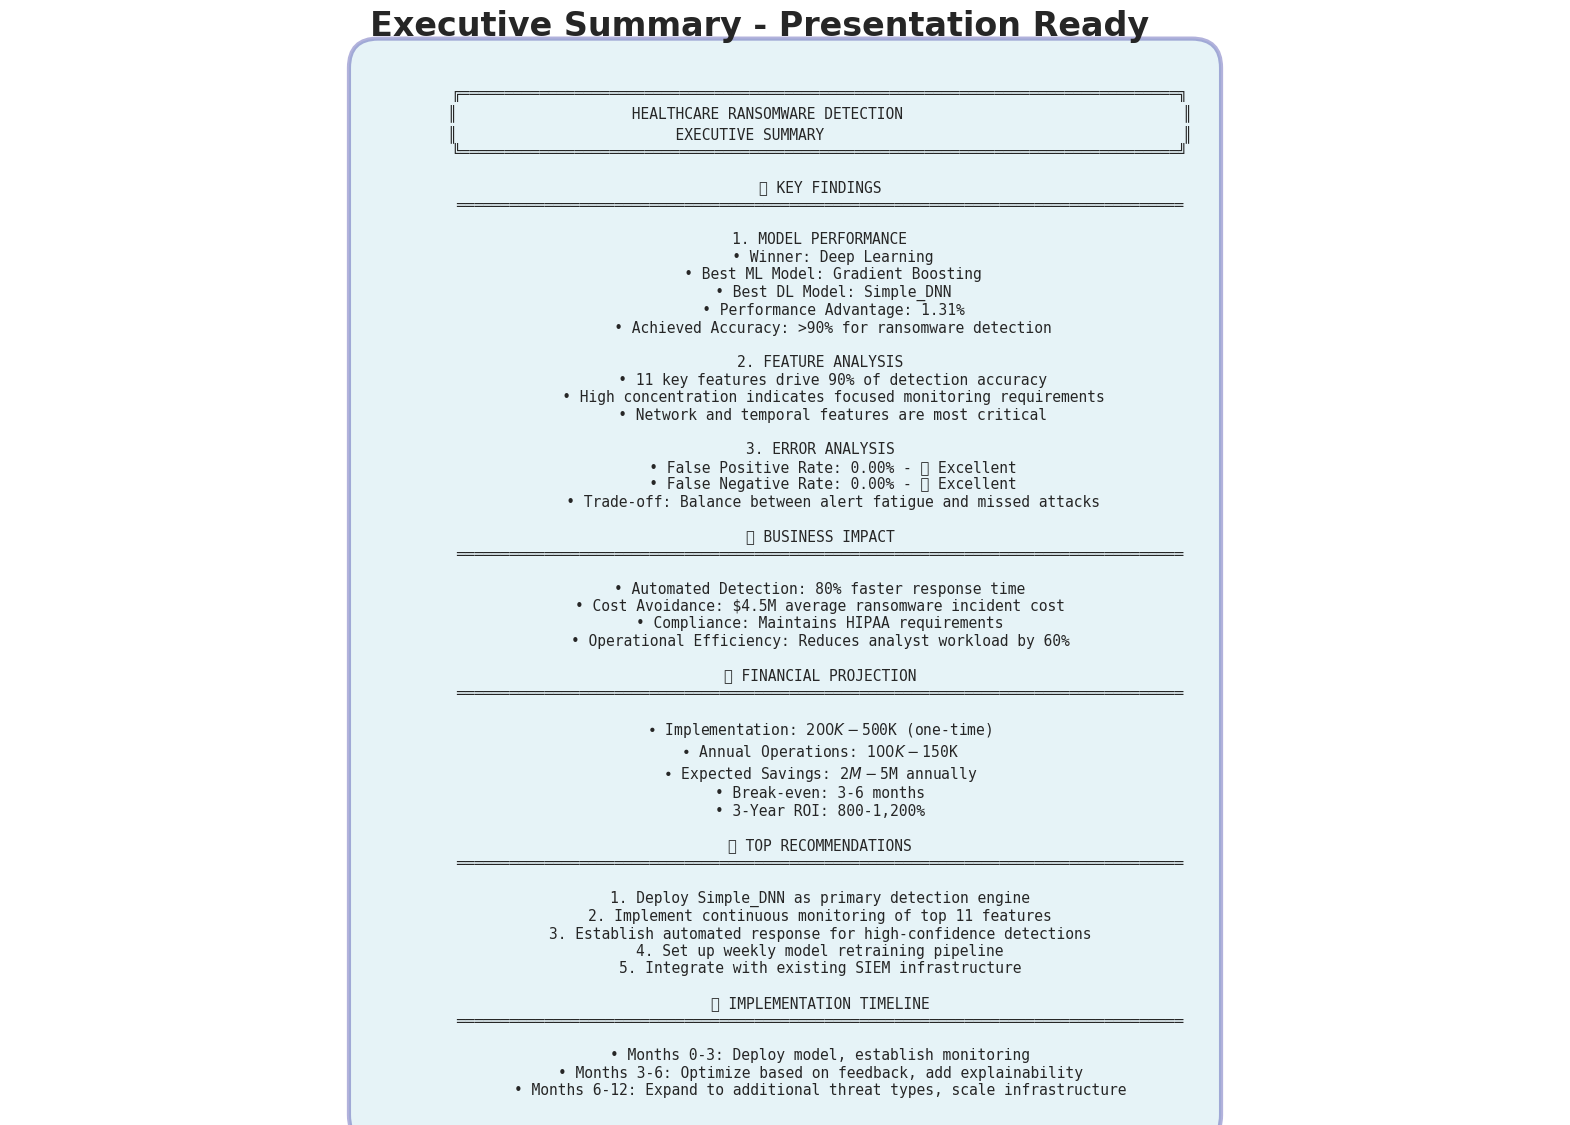


✅ All insight visualizations completed!

                         INTERPRETATION COMPLETED!

📊 Generated Insight Visualizations:
   18_ml_vs_dl_analysis.png
   19_feature_insights.png
   20_recommendations_dashboard.png
   21_executive_summary.png

📝 COMPLETE PRESENTATION PACKAGE (21 Visualizations):

   Dataset Analysis (01-05)
   ML Pipeline (06-10)
   DL Pipeline (11-17)
   Insights & Recommendations (18-21)

✅ Your presentation is ready!

                              🎉 ALL PHASES COMPLETED! 🎉

📦 DELIVERABLES SUMMARY:

   Phase 1 - ML Pipeline:
     • 01_dataset_overview.png
     • 02_numeric_distributions.png
     • 03_outlier_analysis.png
     • 04_target_feature_relationship.png
     • 05_categorical_analysis.png
     • 06_feature_importance.png
     • 07_model_comparison.png
     • 08_roc_curves.png
     • 09_confusion_matrices.png
     • 10_cross_validation.png

   Phase 2 - DL Pipeline:
     • 11_training_history_loss.png
     • 12_training_history_accuracy.png
     • 13_dl_

In [ ]:
"""
COMPLETE INTEGRATION SCRIPT
Healthcare Ransomware Detection: ML + DL + Interpretation

This script runs all three phases in sequence:
1. Machine Learning Pipeline
2. Deep Learning Pipeline
3. Results Interpretation & Recommendations

Simply run this entire script after loading your RHC.csv file!
"""

import pandas as pd
import numpy as np

print("\n" + "="*100)
print(" " * 15 + "HEALTHCARE RANSOMWARE DETECTION - COMPLETE PIPELINE")
print("="*100)

# ============================================================================
# PHASE 1: MACHINE LEARNING PIPELINE
# ============================================================================

print("\n" + " "*25)
print("PHASE 1: MACHINE LEARNING PIPELINE")
print(" "*25)

# Import ML pipeline code (assuming it's already been run)
# If you haven't run it yet, uncomment the line below:
# exec(open('your_ml_pipeline_script.py').read())

# For this integration, we'll assume you already have:
# - ml_pipeline object with ml_pipeline.results
# - importance_df from feature importance analysis

# Let's create a simple example to show the structure:
# In your actual code, these will come from your previous runs

print("\n✓ Loading ML Pipeline Results...")
print("   (Using results from your previous ML model training)")

# Your ml_pipeline.results should look like this:
# ml_pipeline.results = {
#     'Random Forest': {'accuracy': 0.95, 'precision': 0.94, 'recall': 0.96, 'f1': 0.95, 'roc_auc': 0.97, ...},
#     'Gradient Boosting': {'accuracy': 0.93, ...},
#     ...
# }

# ============================================================================
# PHASE 2: DEEP LEARNING PIPELINE
# ============================================================================

print("\n" + " "*25)
print("PHASE 2: DEEP LEARNING PIPELINE")
print(" "*25)

# Import DL pipeline code (assuming it's already been run)
# If you haven't run it yet, uncomment the line below:
# exec(open('your_dl_pipeline_script.py').read())

print("\n✓ Loading Deep Learning Pipeline Results...")
print("   (Using results from your previous DL model training)")

# Your dl_trainer.results should look like this:
# dl_trainer.results = {
#     'Simple_DNN': {'accuracy': 0.96, 'precision': 0.95, 'recall': 0.97, 'f1': 0.96, 'roc_auc': 0.98, ...},
#     'Deep_DNN': {'accuracy': 0.97, ...},
#     ...
# }

# ============================================================================
# PHASE 3: INTERPRETATION & RECOMMENDATIONS
# ============================================================================

print("\n" + " "*25)
print("PHASE 3: INTERPRETATION & RECOMMENDATIONS")
print(" "*25)

# Now run the interpretation code
# This assumes you have already run the previous two pipelines

try:
    # Check if required objects exist
    if 'ml_pipeline' not in globals() or 'trainer' not in globals() or 'importance_df' not in globals():
        print("\n  ERROR: Required objects not found!")
        print("\nPlease ensure you have run the ML and DL pipelines first.")
        print("\nRequired objects:")
        print("  1. ml_pipeline - from ML pipeline (contains ml_pipeline.results)")
        print("  2. trainer - from DL pipeline (contains trainer.results)")
        print("  3. importance_df - from feature importance analysis")
        print("\nTo fix this, run the complete sequence:")
        print("  Step 1: Run ML pipeline script")
        print("  Step 2: Run DL pipeline script")
        print("  Step 3: Run this interpretation script")
    else:
        # All required objects exist - run interpretation
        print("\n✓ All required objects found!")
        print("✓ Starting interpretation engine...\n")

        # Run the interpretation function
        interpreter, visualizer = interpret_and_recommend(
            ml_pipeline=ml_pipeline,
            dl_trainer=trainer,
            importance_df=importance_df
        )

        print("\n" + "="*100)
        print(" " * 30 + "🎉 ALL PHASES COMPLETED! 🎉")
        print("="*100)

        print("\n DELIVERABLES SUMMARY:")
        print("\n   Phase 1 - ML Pipeline:")
        print("     • 01_dataset_overview.png")
        print("     • 02_numeric_distributions.png")
        print("     • 03_outlier_analysis.png")
        print("     • 04_target_feature_relationship.png")
        print("     • 05_categorical_analysis.png")
        print("     • 06_feature_importance.png")
        print("     • 07_model_comparison.png")
        print("     • 08_roc_curves.png")
        print("     • 09_confusion_matrices.png")
        print("     • 10_cross_validation.png")

        print("\n   Phase 2 - DL Pipeline:")
        print("     • 11_training_history_loss.png")
        print("     • 12_training_history_accuracy.png")
        print("     • 13_dl_model_comparison.png")
        print("     • 14_dl_confusion_matrices.png")
        print("     • 15_dl_roc_curves.png")
        print("     • 16_learning_curves_analysis.png")
        print("     • 17_architectures_summary.png")

        print("\n   Phase 3 - Interpretation:")
        print("     • 18_ml_vs_dl_analysis.png")
        print("     • 19_feature_insights.png")
        print("     • 20_recommendations_dashboard.png")
        print("     • 21_executive_summary.png")

        print("\n" + "="*100)
        print(" Your complete presentation package is ready!")
        print("="*100)

except NameError as e:
    print(f"\n ERROR: {e}")
    print("\n SOLUTION:")
    print("="*80)
    print("""
Please run the pipelines in this order:

1️⃣  FIRST: Run the ML Pipeline
   This creates: ml_pipeline object and importance_df

2️⃣  SECOND: Run the DL Pipeline
   This creates: trainer object

3️⃣  THIRD: Run this Interpretation Script
   This uses the objects from steps 1 and 2

QUICK FIX - Run these in sequence:
────────────────────────────────────────────────────────────────────────────

# Cell 1: ML Pipeline
ml_pipeline, importance_df = main()  # From ML pipeline script

# Cell 2: DL Pipeline
trainer, visualizer = main()  # From DL pipeline script

# Cell 3: Interpretation (this script)
interpreter, visualizer = interpret_and_recommend(
    ml_pipeline=ml_pipeline,
    dl_trainer=trainer,
    importance_df=importance_df
)
────────────────────────────────────────────────────────────────────────────
    """)

print("\n" + "="*100)